In [1]:
import os
os.chdir(r"C:\DataScienceModels\AttritionUseCase")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('attrition_aggregated.csv',index_col=0)

In [4]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 1 to 624
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill                      593 non-null    object
 1   Month                      624 non-null    object
 2   Total number of resources  624 non-null    int64 
 3   Total attrition            624 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.4+ KB


In [6]:
df.shape

(624, 4)

In [7]:
df.describe()

,Total number of resources,Total attrition
count,624.000000,624.000000
mean,54.099359,1.838141
std,62.850275,2.697318
min,1.000000,0.000000
25%,8.000000,0.000000
50%,25.000000,1.000000
75%,79.000000,2.000000
max,286.000000,21.000000


In [8]:
df.columns

Index(['Skill', 'Month', 'Total number of resources', 'Total attrition'], dtype='object')

In [9]:
df['Skill'].unique()

array(['.NET', 'AGILE', 'ARCHITECT', 'BA', 'BPM/PEGA', 'CLOUD', 'DATA',
       'DIGITAL', 'JAVA', 'L1/L2/L3', 'LEGACY', 'MAINFRAME', 'NFT',
       'OTHERS', 'PM', 'SCM/DEVOPS', 'SOA', 'TESTING', nan], dtype=object)

In [10]:
df.isnull().any()

Skill                         True
Month                        False
Total number of resources    False
Total attrition              False
dtype: bool

In [11]:
df[df['Skill'].isnull()]

,Skill,Month,Total number of resources,Total attrition
594,NaN,31-01-2018,1,0
595,NaN,28-02-2018,1,0
596,NaN,31-03-2018,1,0
597,NaN,30-04-2018,6,1
598,NaN,31-05-2018,5,0
599,NaN,30-06-2018,8,2
600,NaN,31-07-2018,8,1
601,NaN,31-08-2018,10,1
602,NaN,30-09-2018,12,0
603,NaN,31-10-2018,15,0


In [12]:
len(df[df['Skill'].isnull()])

31

In [13]:
df_base = df.copy

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(593, 4)

In [16]:
df.isnull().any().sum()

0

In [17]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [18]:
df['Skill'].value_counts()

LEGACY        33
BPM/PEGA      33
MAINFRAME     33
JAVA          33
DIGITAL       33
PM            33
.NET          33
TESTING       33
L1/L2/L3      33
ARCHITECT     33
SOA           33
BA            33
SCM/DEVOPS    33
OTHERS        33
AGILE         33
DATA          33
NFT           33
CLOUD         32
Name: Skill, dtype: int64

In [19]:
df['Month'].value_counts()

31-10-2018    18
31-05-2018    18
30-06-2018    18
30-06-2019    18
31-01-2018    18
31-05-2020    18
31-07-2020    18
30-09-2020    18
31-12-2019    18
30-09-2018    18
31-07-2019    18
30-04-2020    18
31-08-2018    18
31-03-2019    18
30-09-2019    18
30-04-2018    18
30-11-2019    18
31-05-2019    18
30-06-2020    18
31-12-2018    18
31-08-2019    18
31-08-2020    18
31-10-2019    18
30-11-2018    18
30-04-2019    18
28-02-2018    18
28-02-2019    18
31-03-2020    18
31-01-2019    18
31-03-2018    18
31-01-2020    18
29-02-2020    18
31-07-2018    17
Name: Month, dtype: int64

In [20]:
df_skill_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()

<ipython-input-20-b3b0b5389c56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_skill_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()


In [21]:
#df_skill_summary.add_suffix('_SumAgg').reset_index() 
df_skill_summary.reset_index()

,Skill,Total number of resources,Total attrition
0,.NET,5823,200
1,AGILE,667,32
2,ARCHITECT,85,3
3,BA,1750,60
4,BPM/PEGA,3094,82
5,CLOUD,101,8
6,DATA,5187,181
7,DIGITAL,476,18
8,JAVA,1068,51
9,L1/L2/L3,114,6


In [22]:
df['dates'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')

In [23]:
#df['Month_Year'] = df['dates'].dt.strftime('%b-%Y')
df['Month_Year'] = df['dates'].dt.strftime('%Y-%m')

In [24]:
df.head()

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,2018-01
2,.NET,28-02-2018,119,5,2018-02-28,2018-02
3,.NET,31-03-2018,121,4,2018-03-31,2018-03
4,.NET,30-04-2018,165,3,2018-04-30,2018-04
5,.NET,31-05-2018,164,2,2018-05-31,2018-05


In [25]:
df_date_summary = df.groupby("Month_Year")["Total number of resources", "Total attrition"].sum()

<ipython-input-25-2fa069c5ac7c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date_summary = df.groupby("Month_Year")["Total number of resources", "Total attrition"].sum()


In [26]:
df_date_summary.reset_index()

,Month_Year,Total number of resources,Total attrition
0,2018-01,512,49
1,2018-02,498,15
2,2018-03,517,27
3,2018-04,847,25
4,2018-05,835,23
5,2018-06,896,45
6,2018-07,909,25
7,2018-08,941,36
8,2018-09,955,57
9,2018-10,895,30


<AxesSubplot:xlabel='Total number of resources', ylabel='Count'>

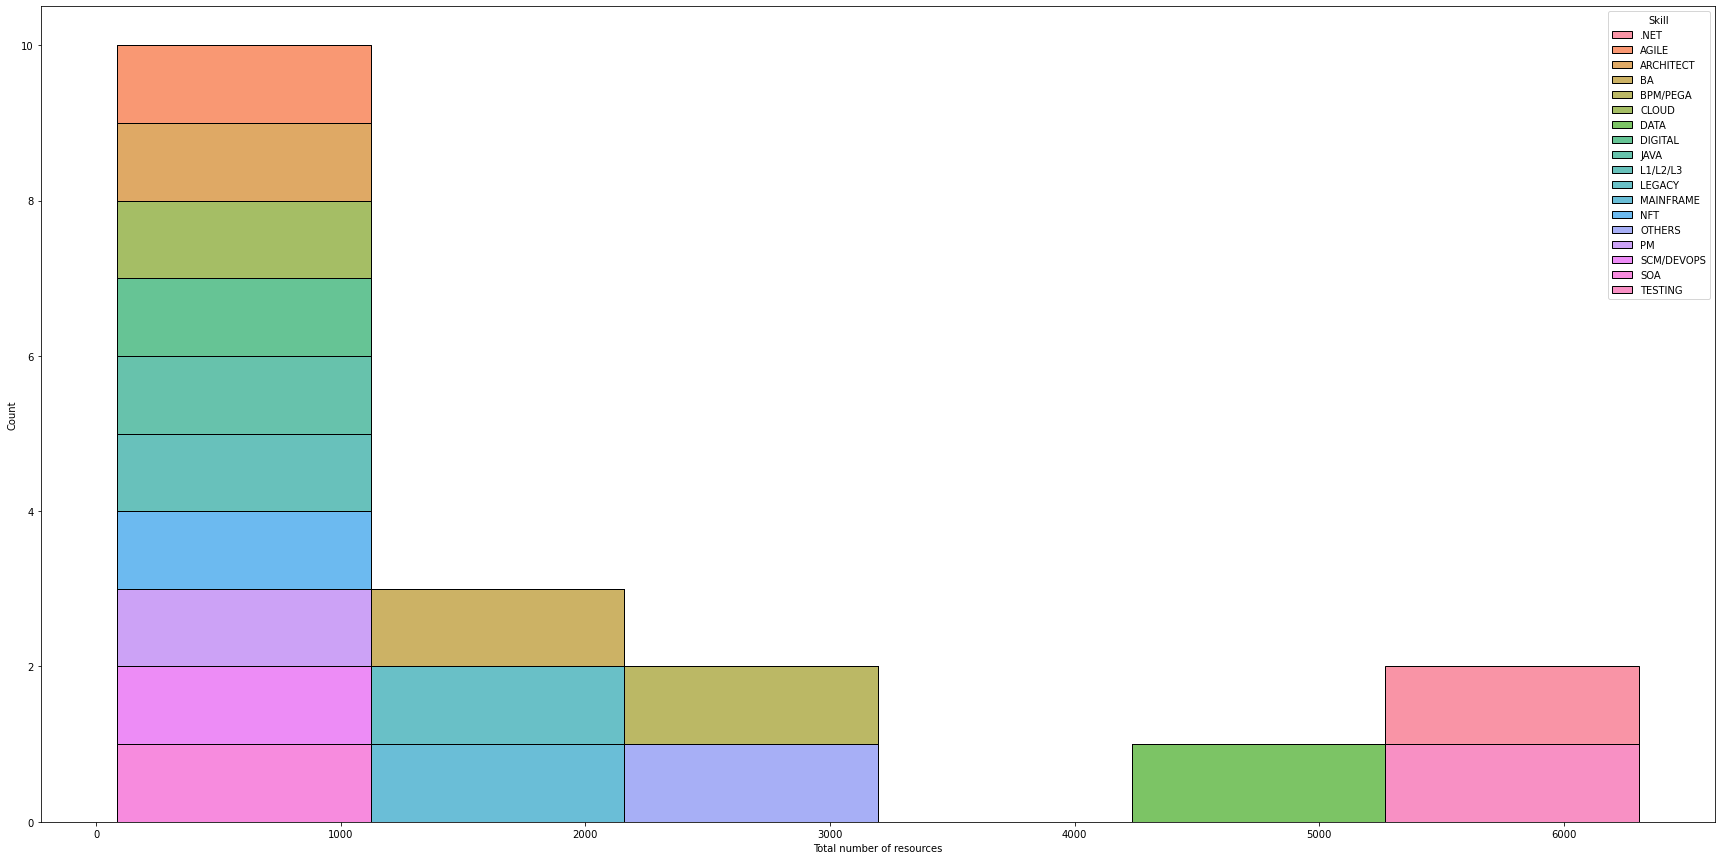

In [27]:
plt.figure(figsize=(30,15))
sns.histplot(data=df_skill_summary, x="Total number of resources", hue="Skill", multiple="stack")

<AxesSubplot:xlabel='Total number of resources', ylabel='Count'>

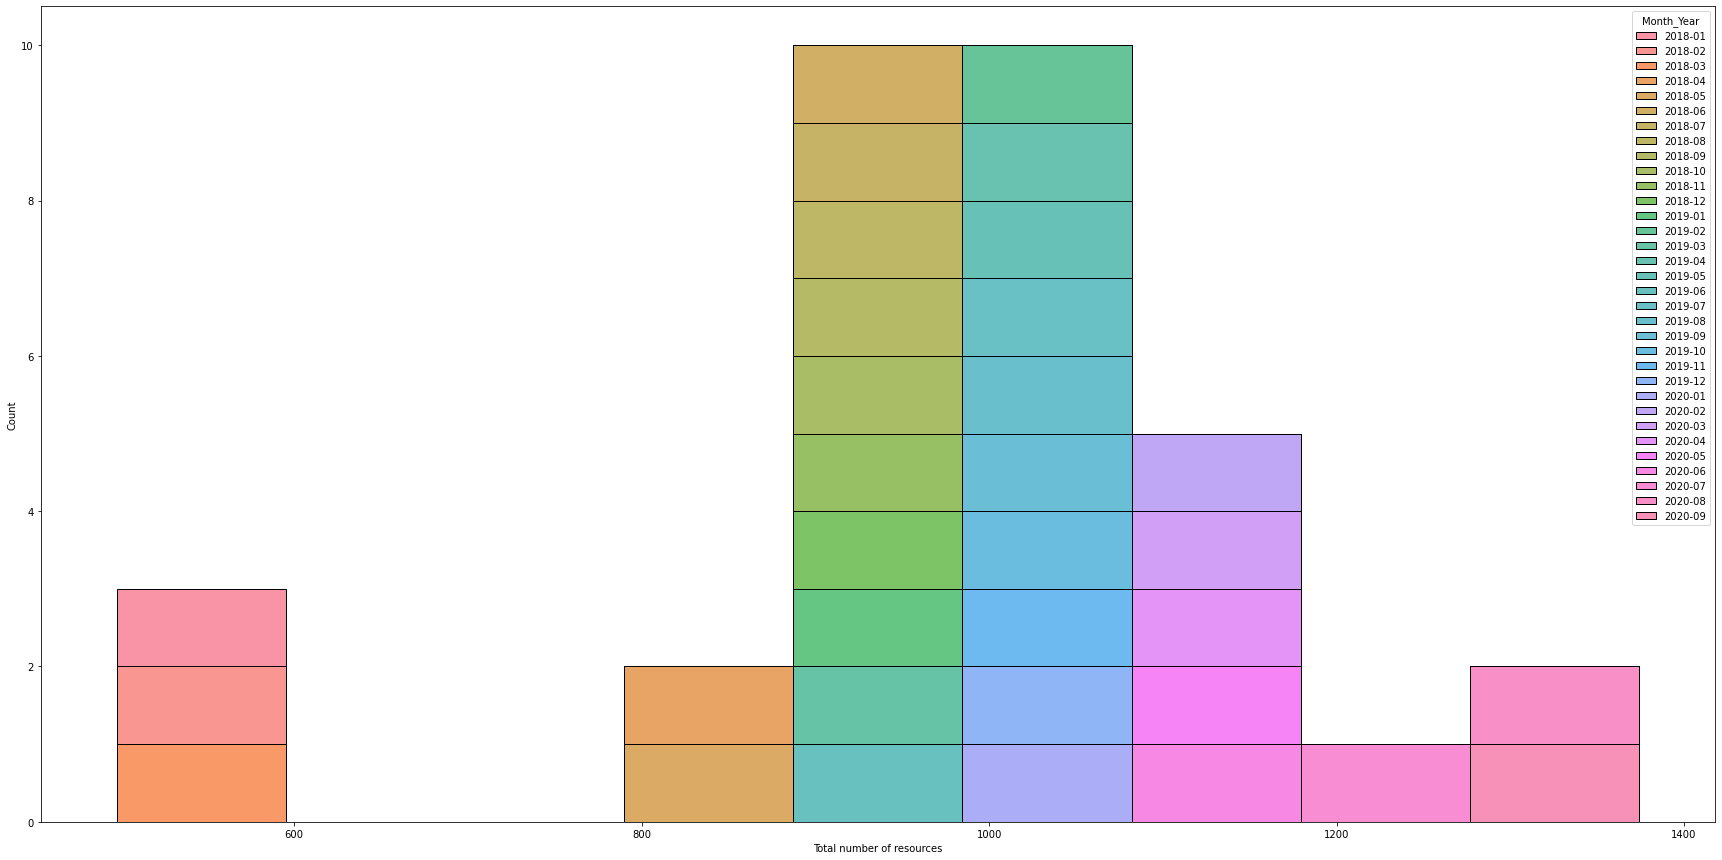

In [28]:
plt.figure(figsize=(30,15))
sns.histplot(data=df_date_summary, x="Total number of resources", hue="Month_Year", multiple="stack")

<AxesSubplot:xlabel='Total attrition', ylabel='Count'>

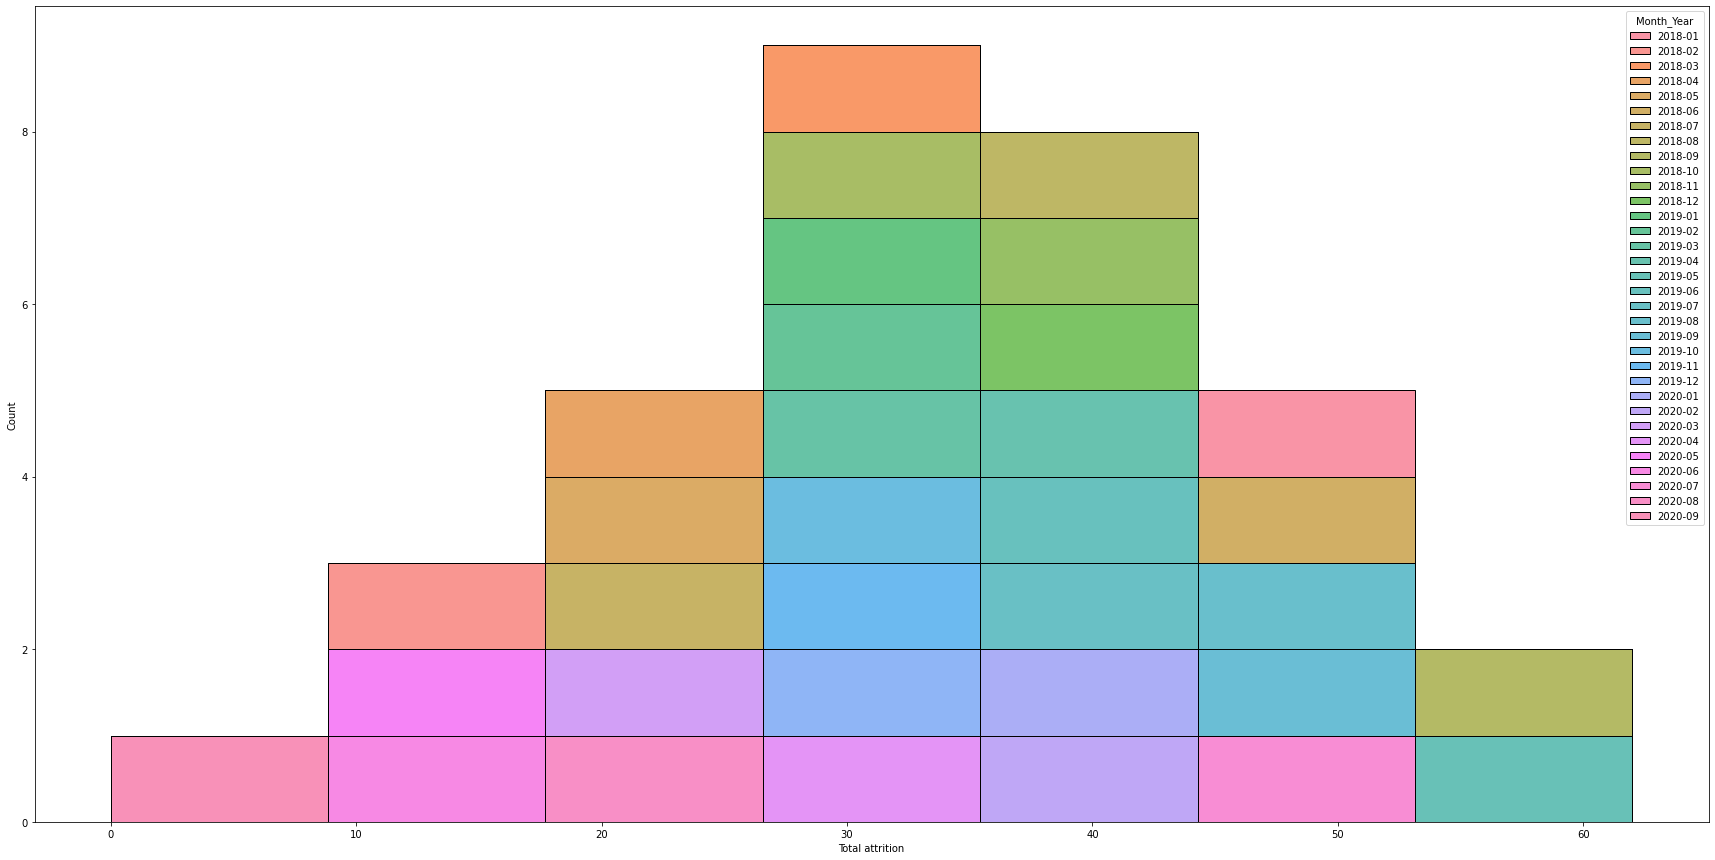

In [29]:
plt.figure(figsize=(30,15))
sns.histplot(data=df_date_summary, x="Total attrition", hue="Month_Year", multiple="stack")

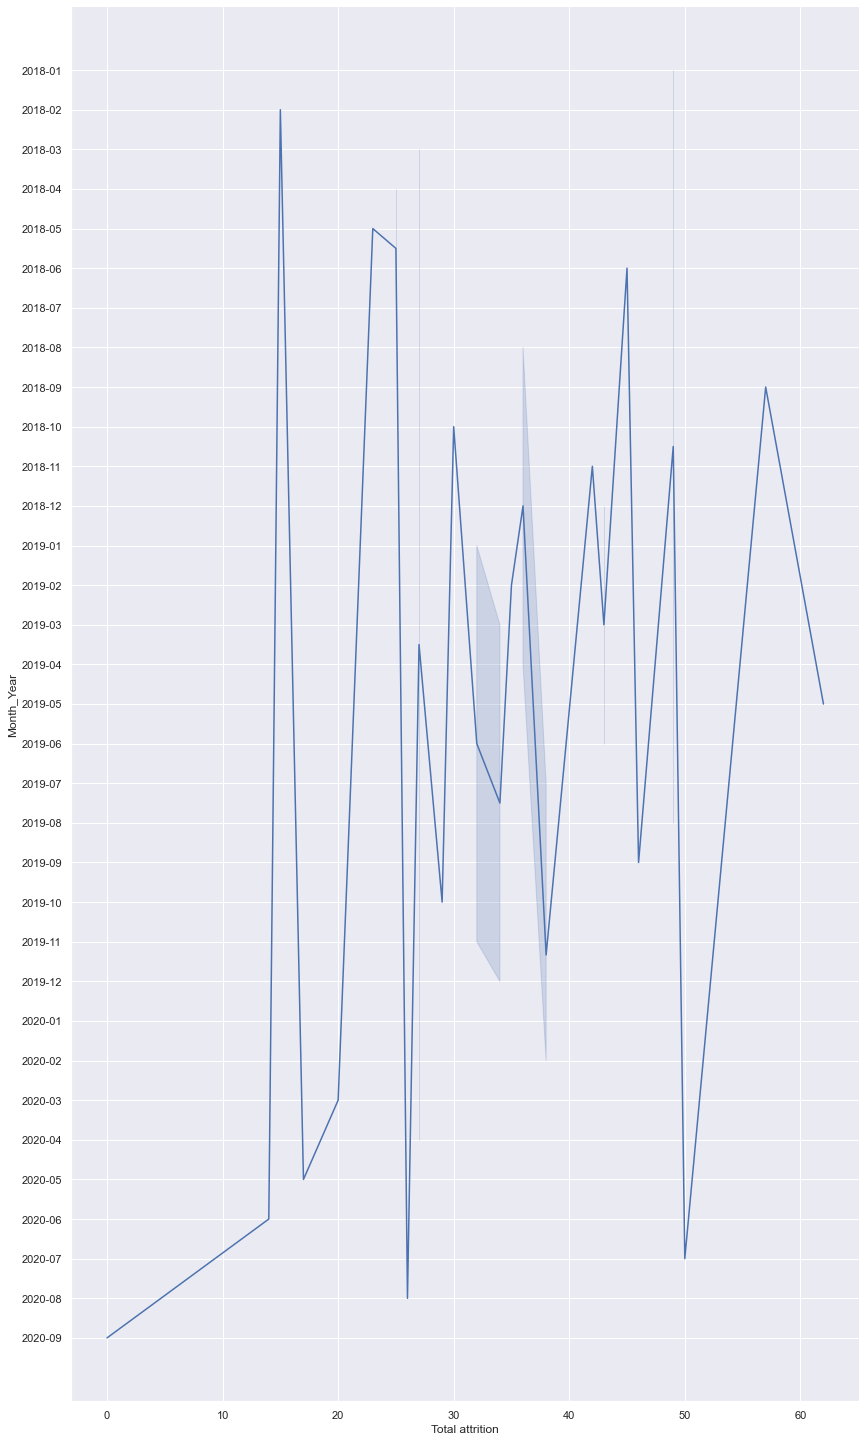

In [30]:
#plt.rcParams['figure.figsize']=(40,30)
sns.set_theme(style="darkgrid")
sns.relplot(x="Total attrition",y="Month_Year",kind="line",data=df_date_summary,height=20, aspect=0.6)

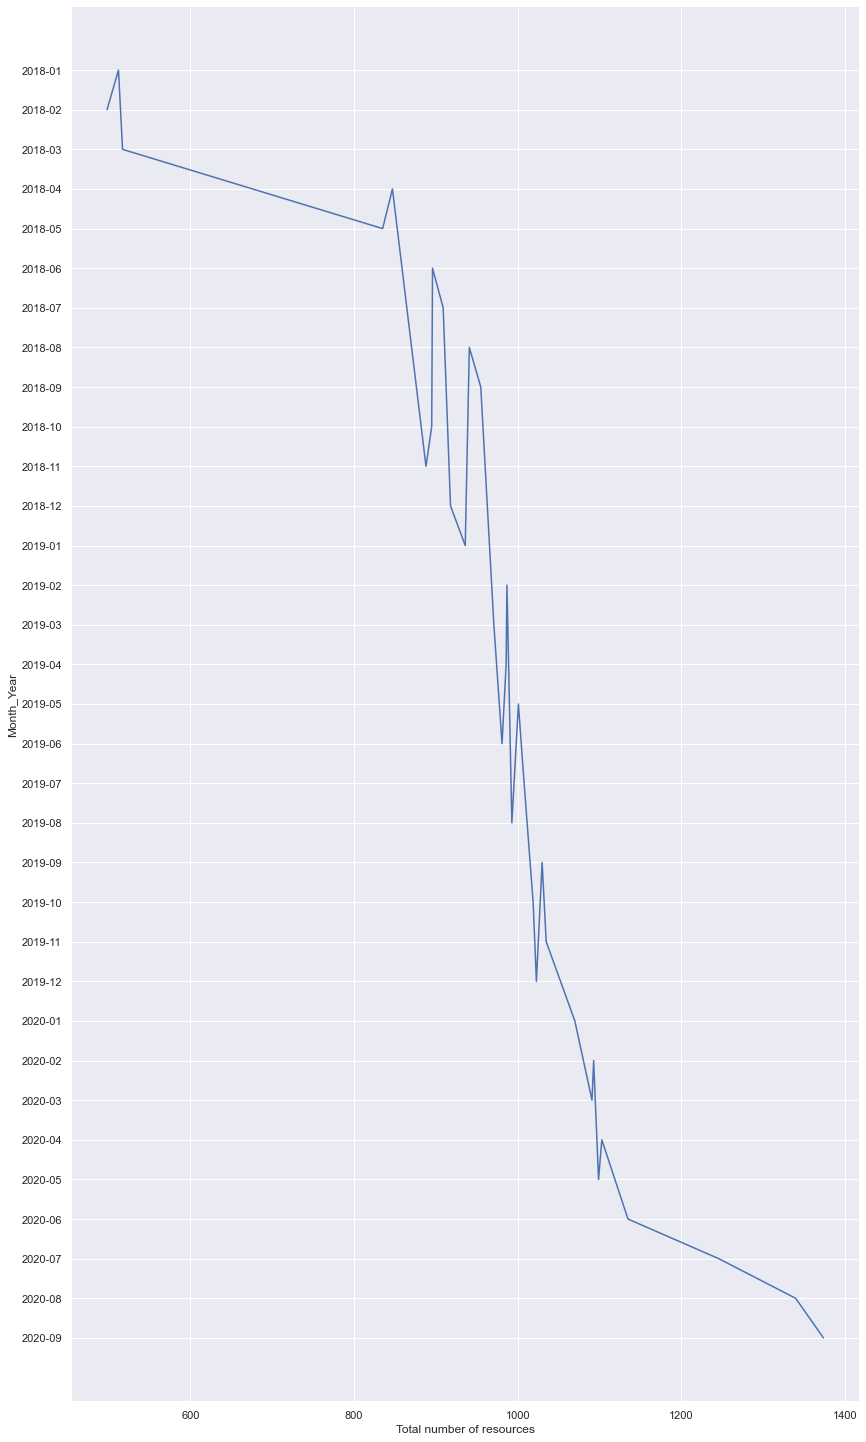

In [31]:
#plt.rcParams['figure.figsize']=(40,30)
sns.set_theme(style="darkgrid")
sns.relplot(x="Total number of resources",y="Month_Year",kind="line",data=df_date_summary,height=20, aspect=0.6)

<AxesSubplot:xlabel='Total attrition', ylabel='Month_Year'>

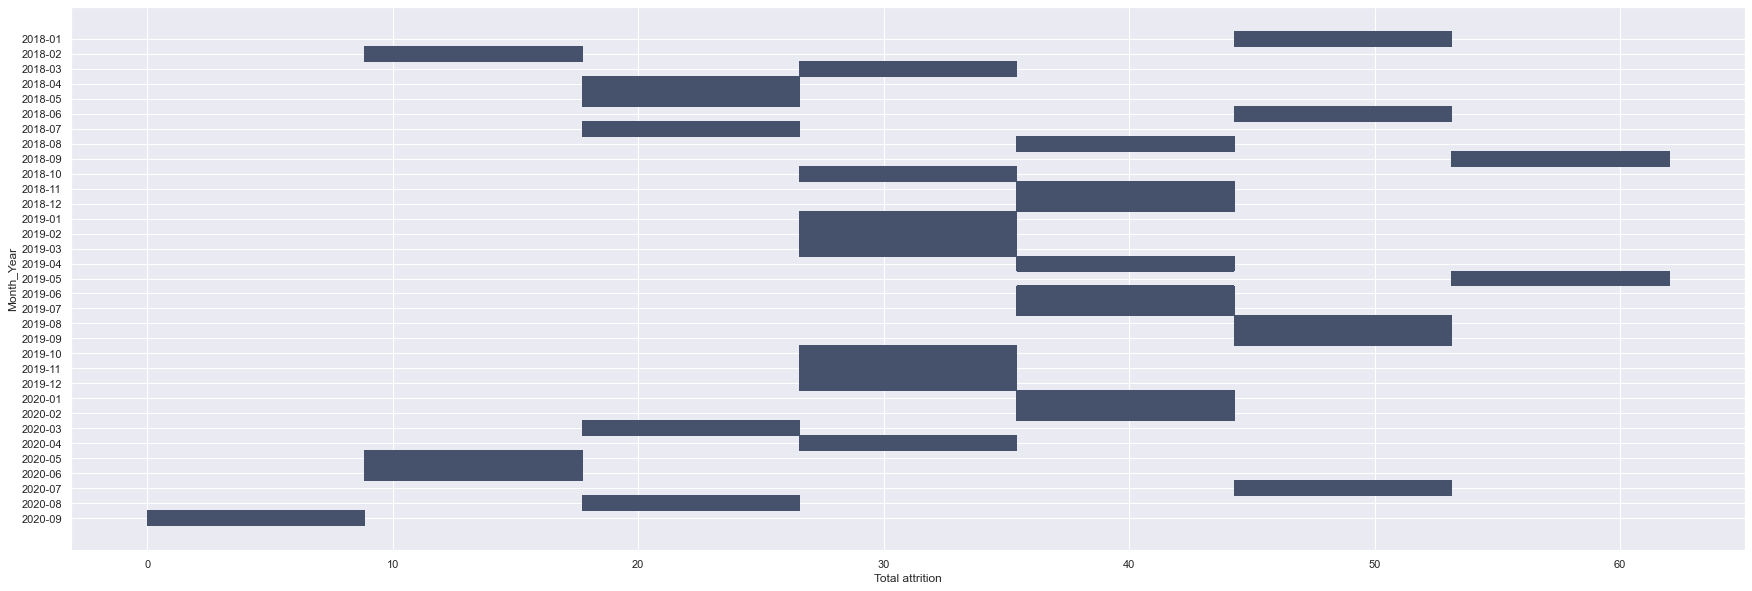

In [32]:
plt.figure(figsize=(30,10))
sns.histplot(data=df_date_summary,x="Total attrition",y="Month_Year")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

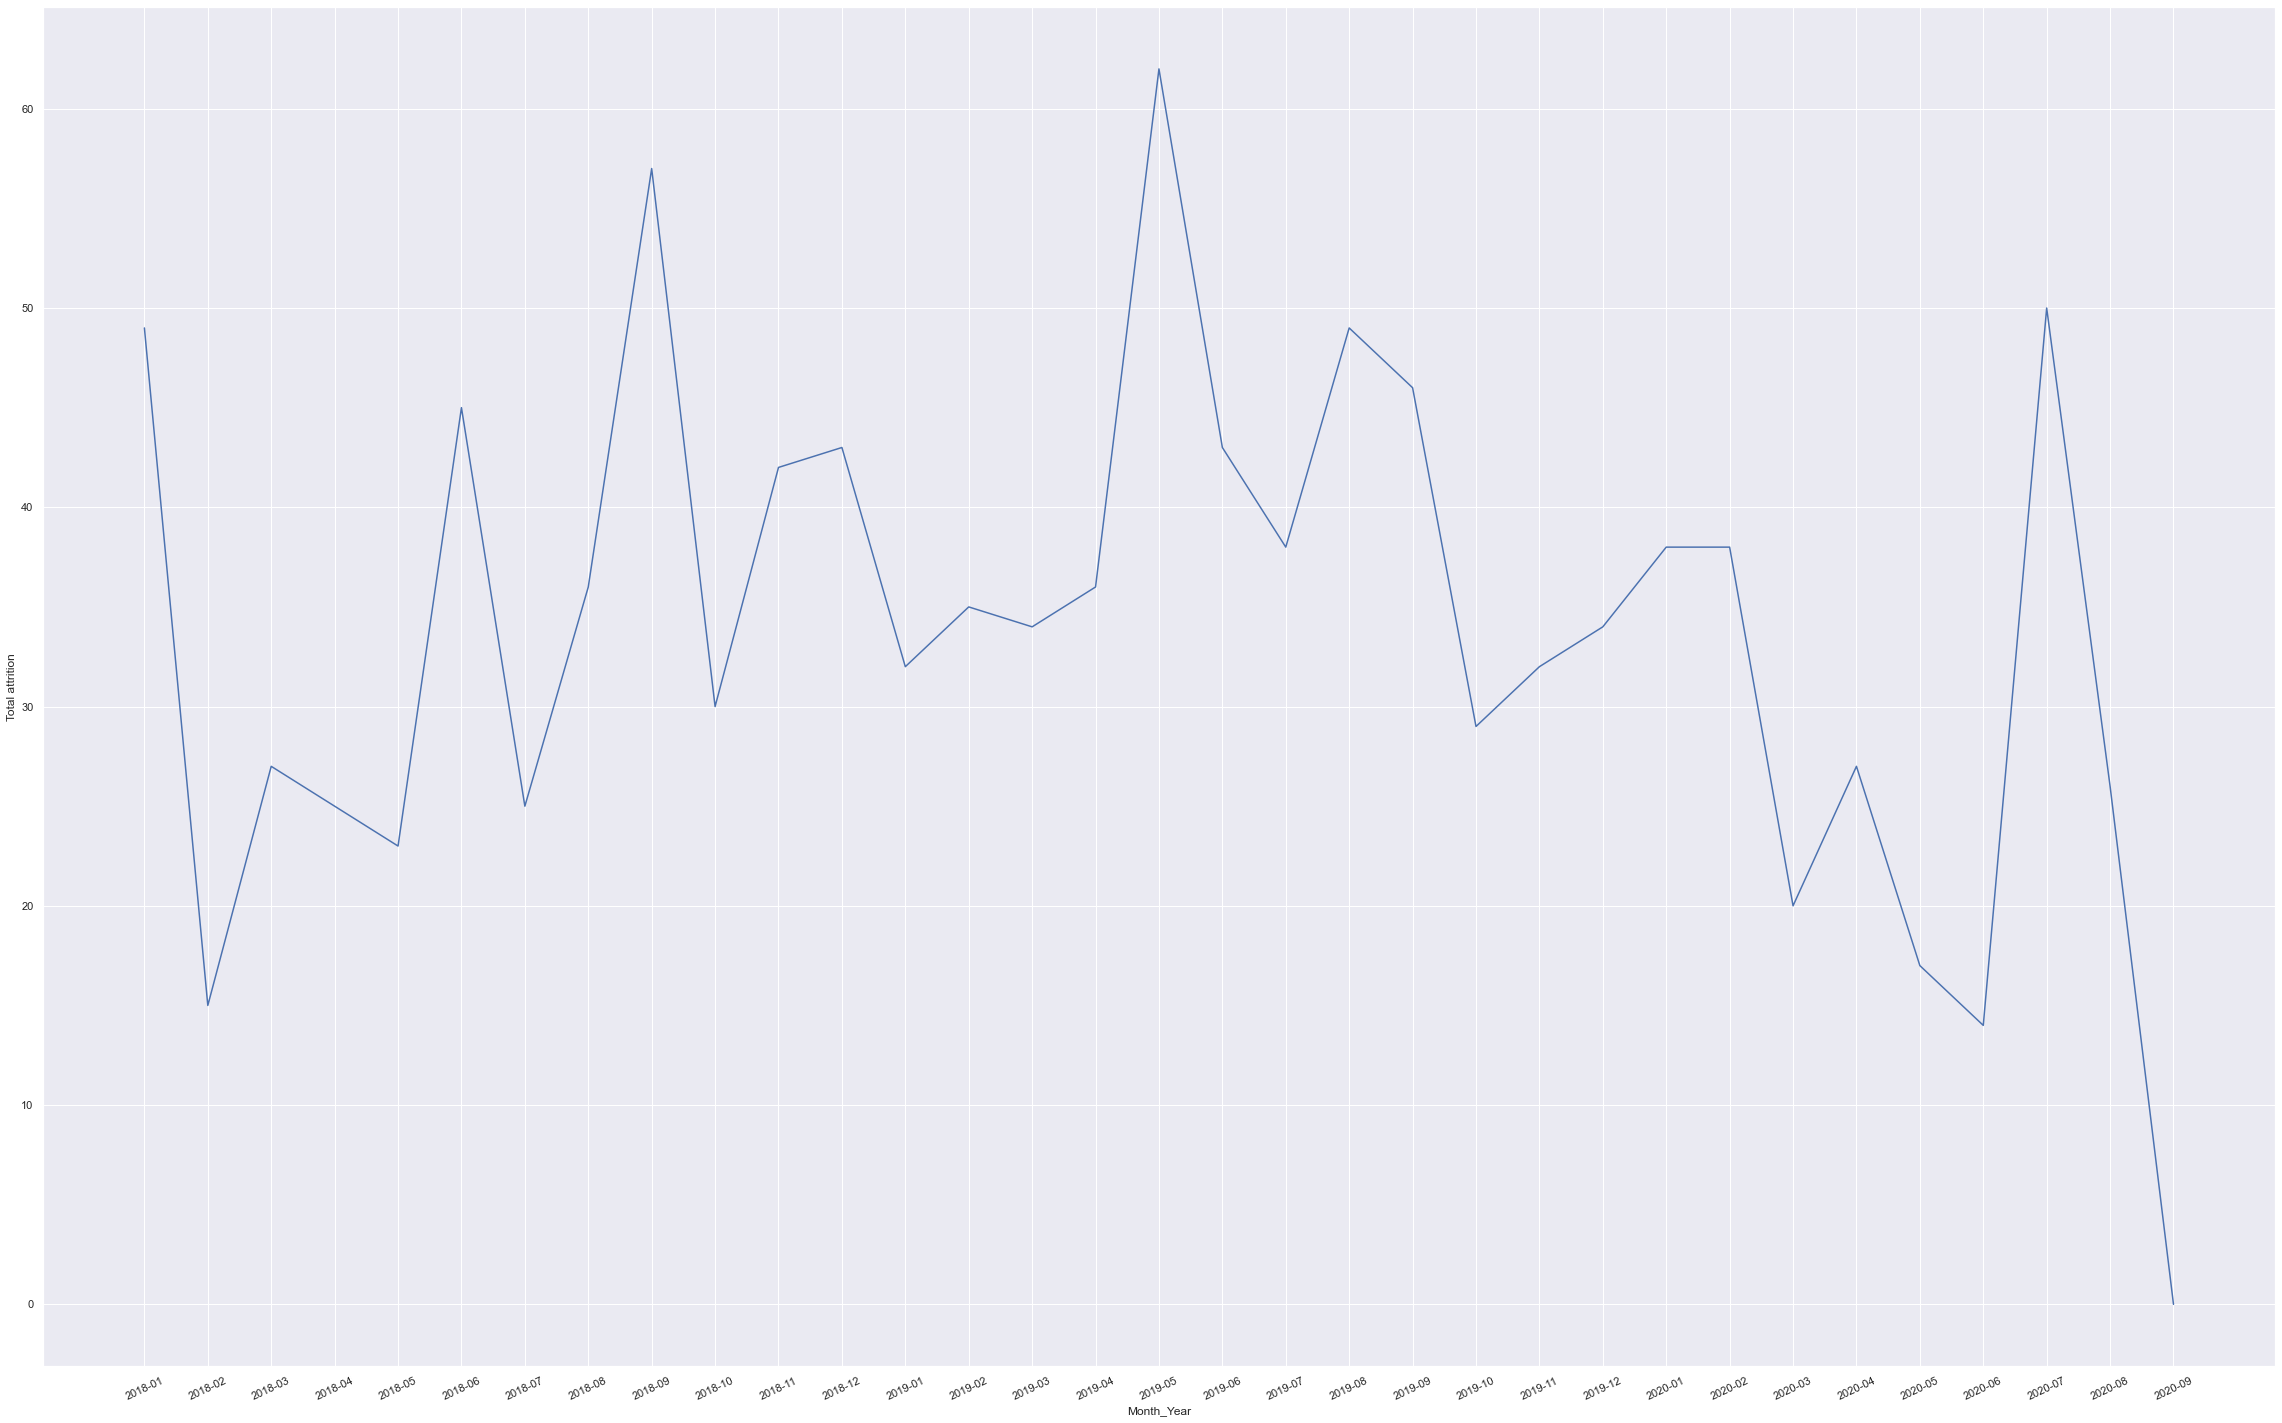

In [33]:
plt.figure(figsize=(40,25))
sns.lineplot(x="Month_Year",y="Total attrition",data =df_date_summary )
plt.xticks(rotation = 25)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

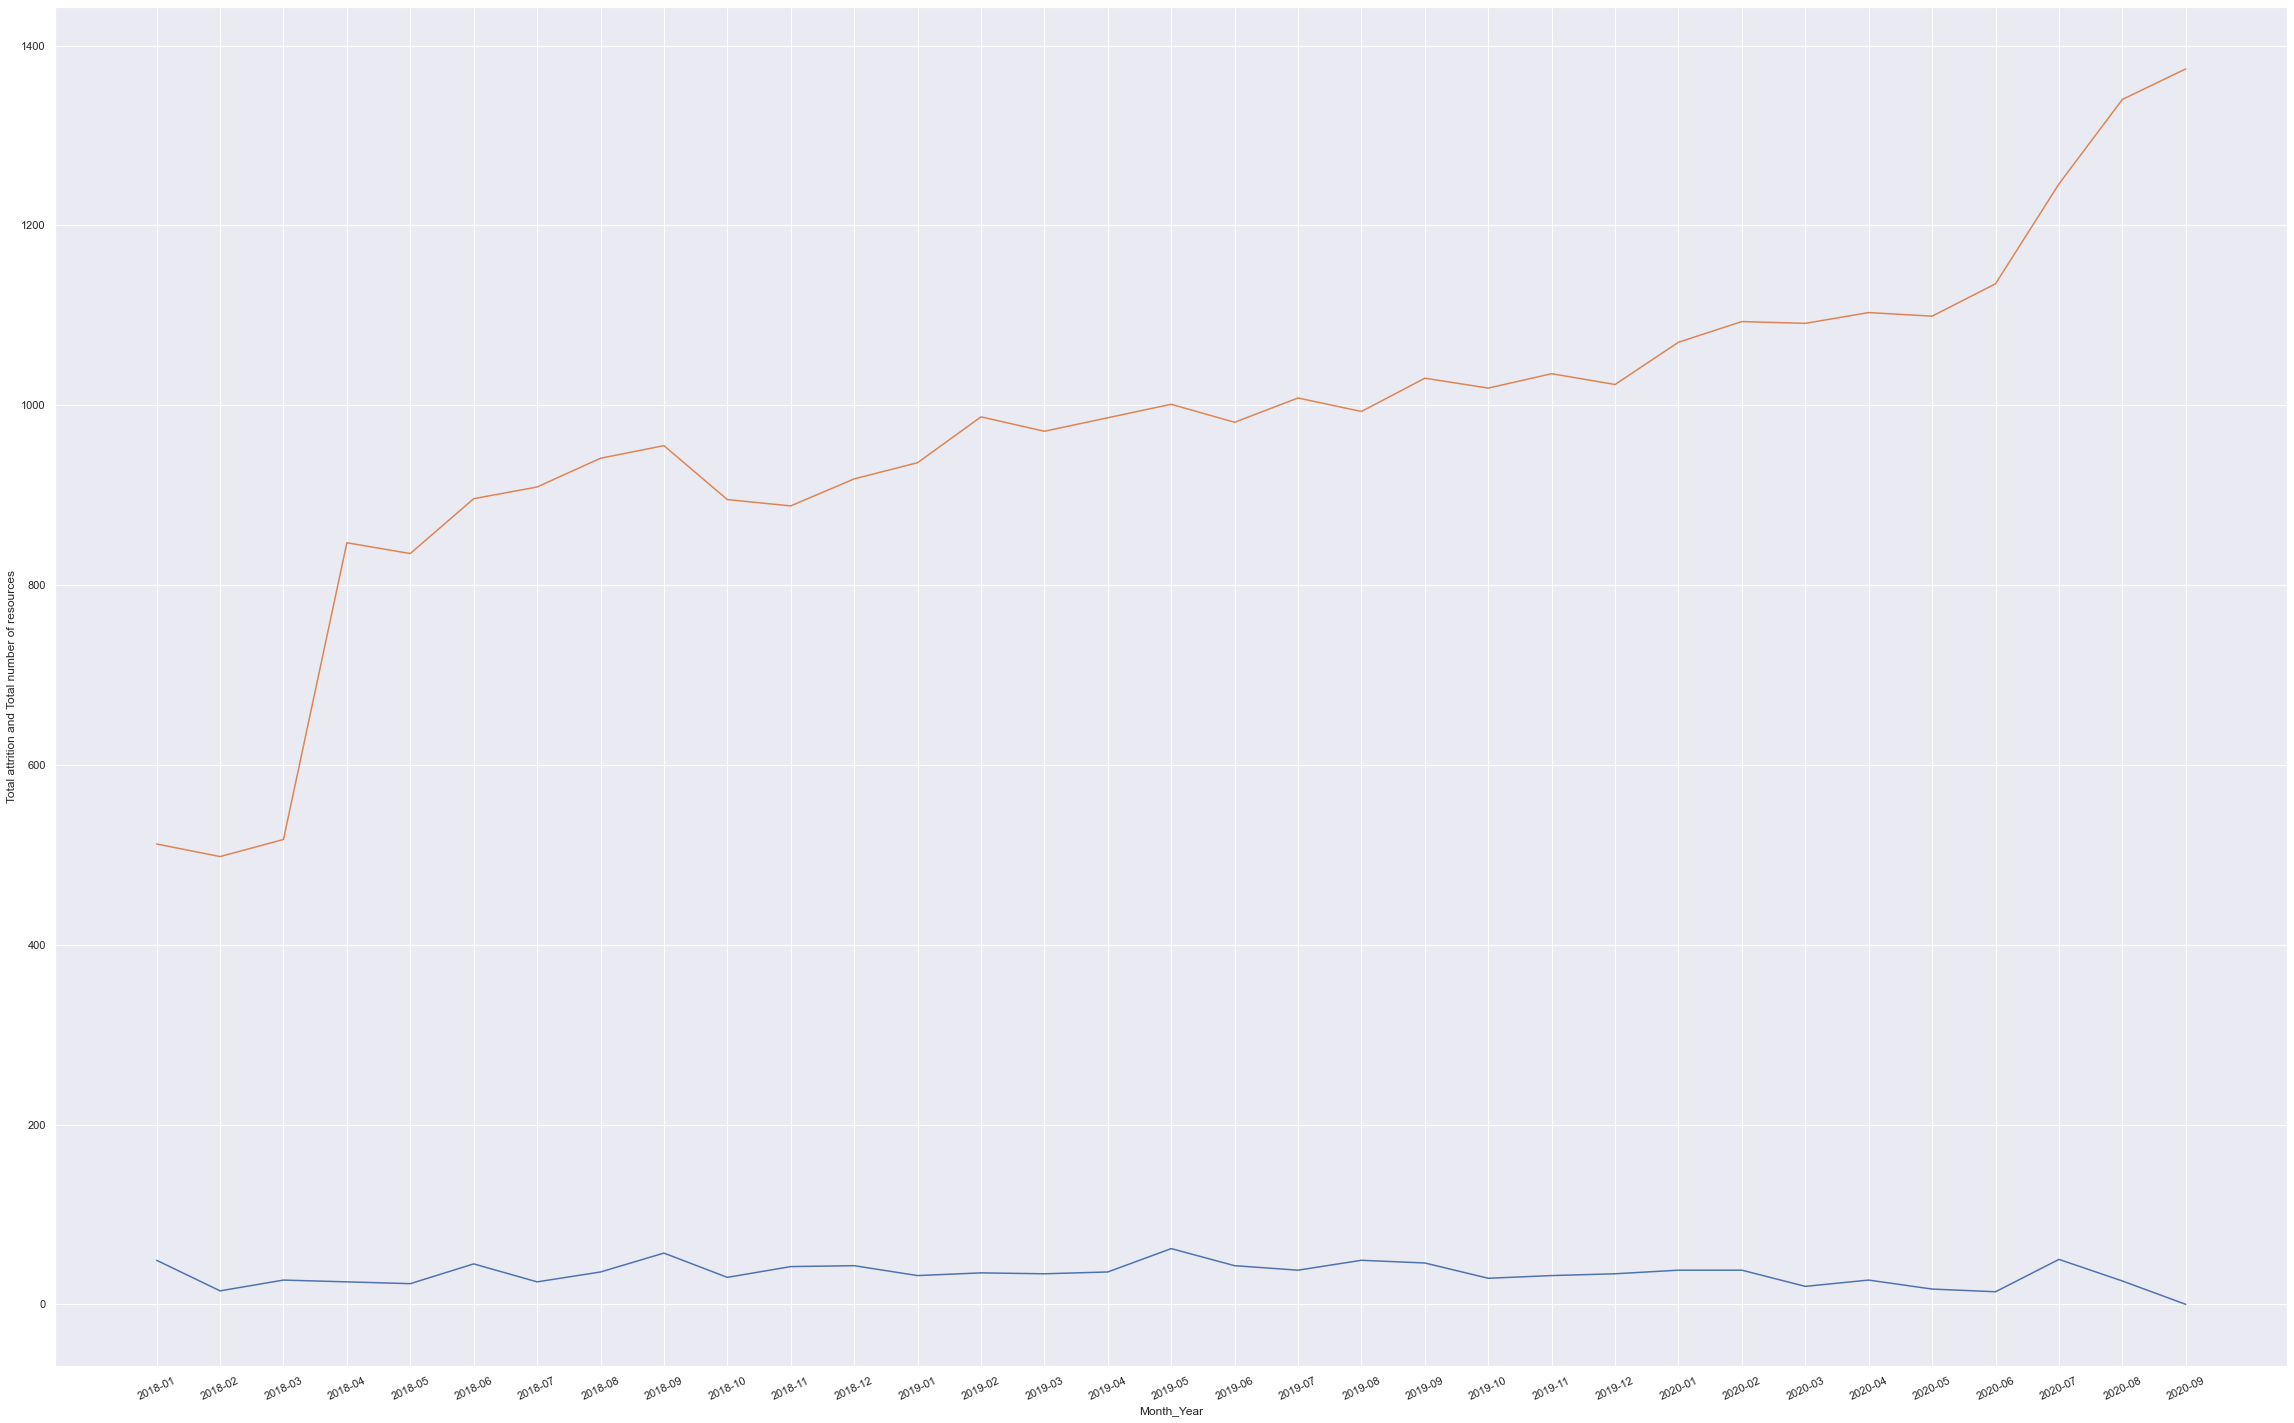

In [34]:
plt.figure(figsize=(40,25))
sns.lineplot(x = "Month_Year", y = "Total attrition", data = df_date_summary)
sns.lineplot(x = "Month_Year", y = "Total number of resources", data = df_date_summary)
plt.ylabel("Total attrition and Total number of resources")
plt.xticks(rotation = 25)

<AxesSubplot:xlabel='Month_Year', ylabel='Total attrition'>

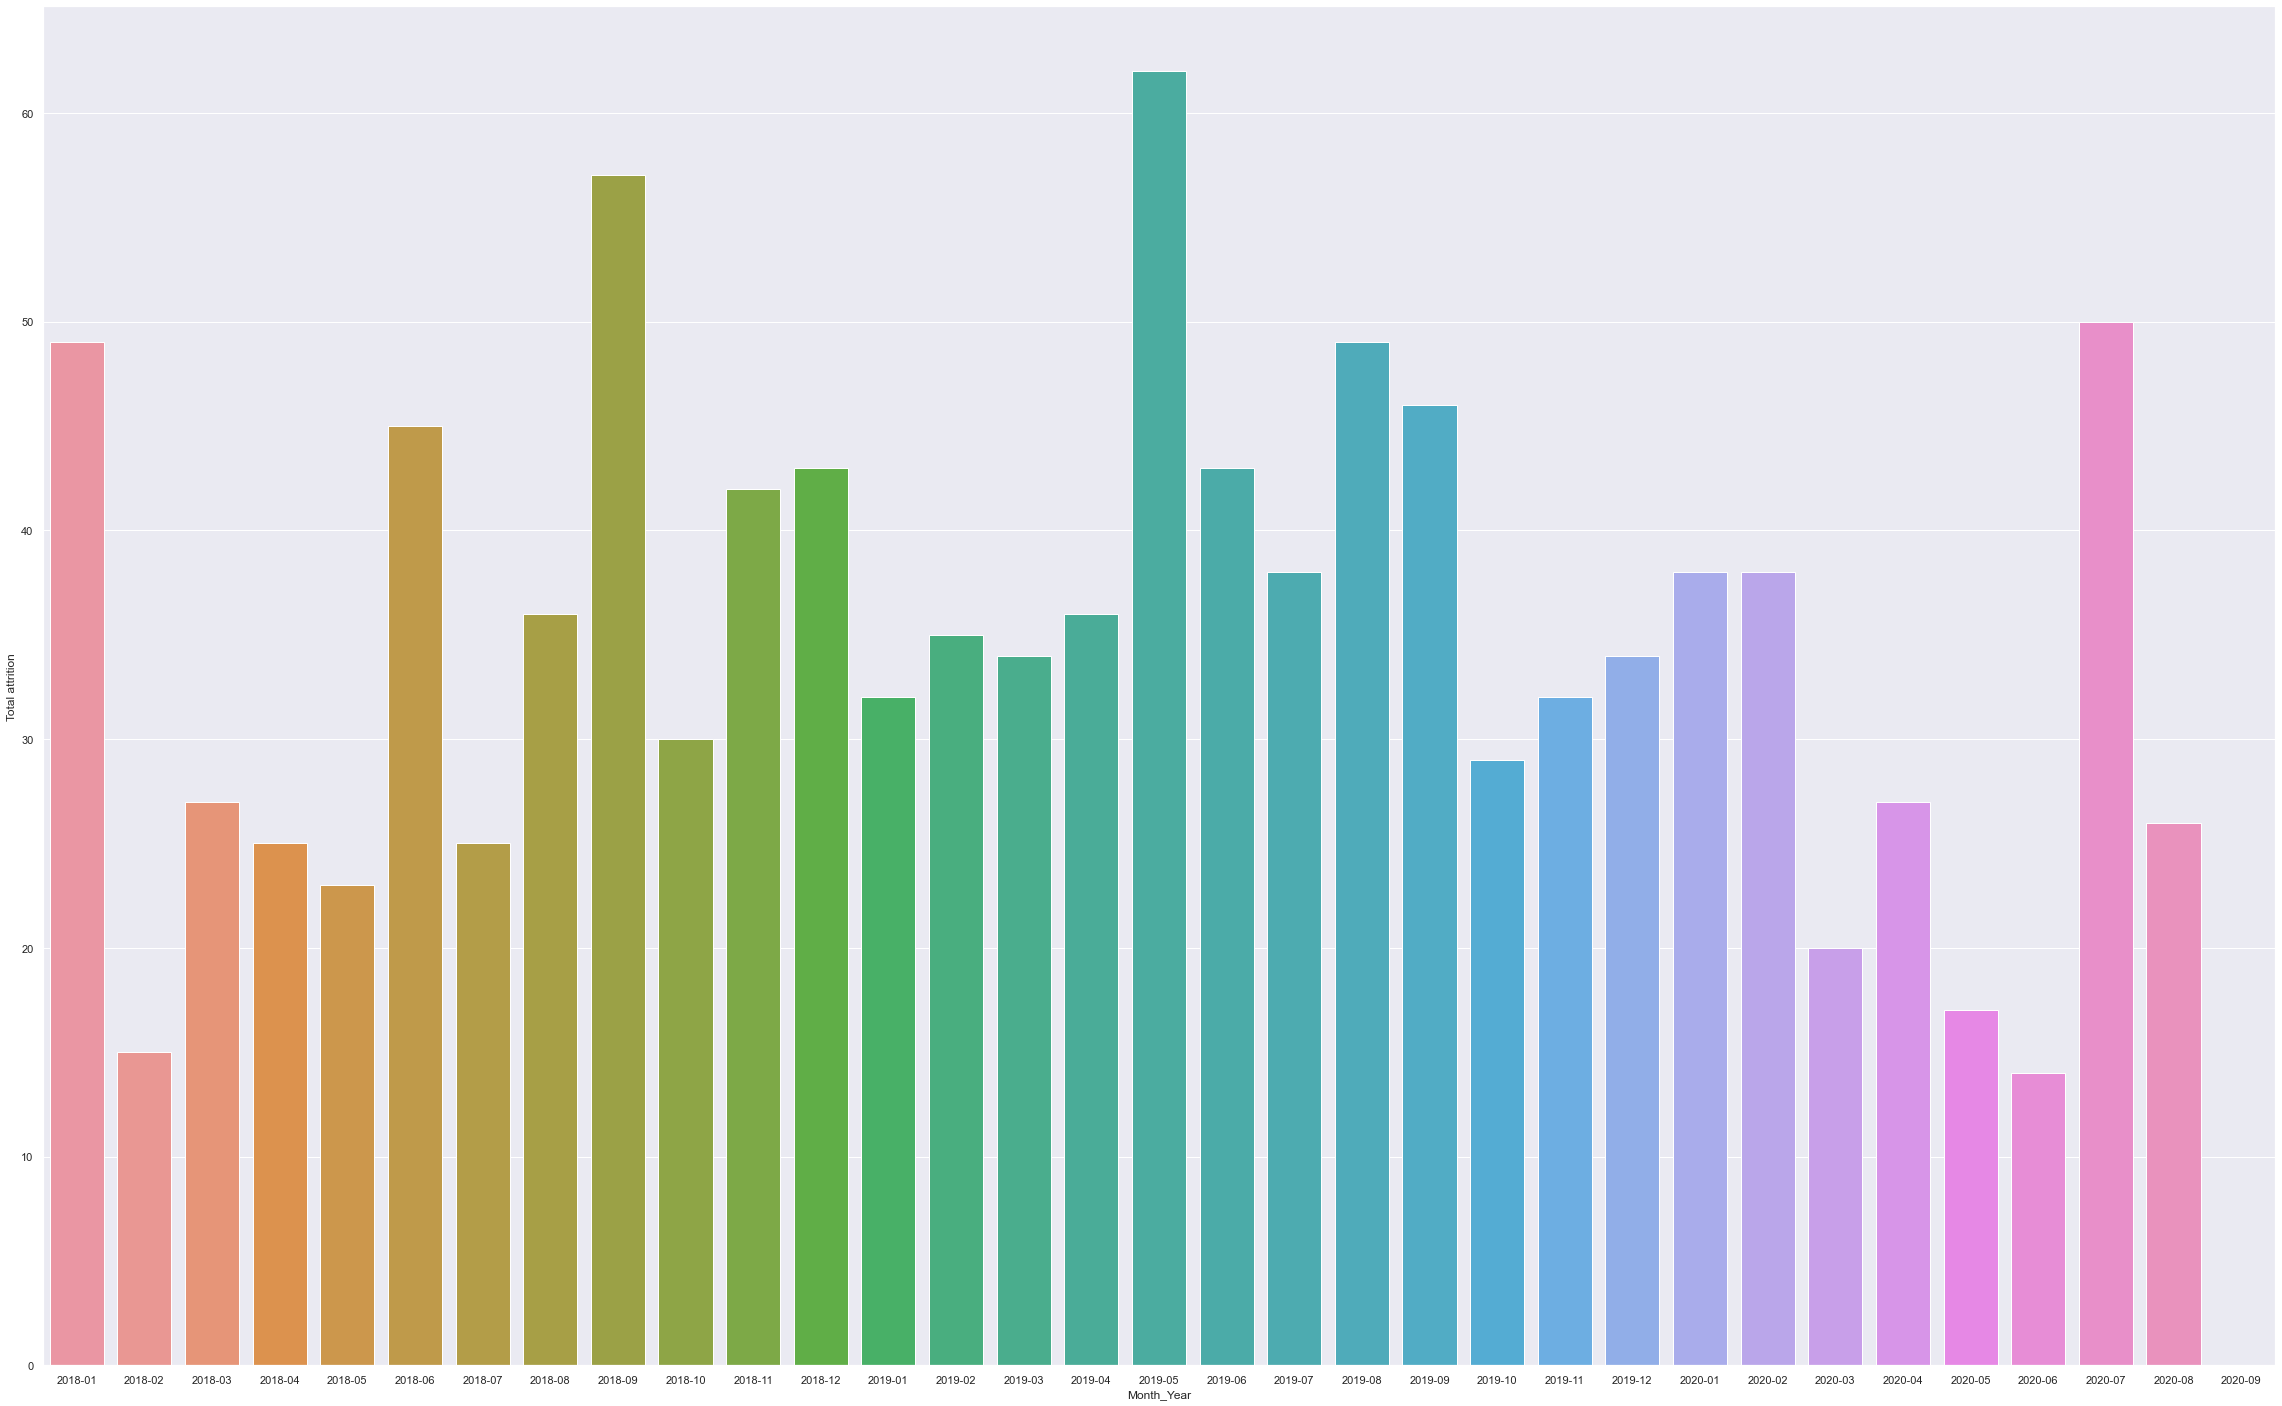

In [35]:
plt.figure(figsize=(40,25))
sns.barplot(x = 'Month_Year',y='Total attrition',data = df_date_summary.reset_index() )

In [36]:
df_date_summary = df_date_summary.reset_index()

In [37]:
df_date_2018 = df_date_summary[df_date_summary['Month_Year'].str.contains('2018')]
df_date_2018

,Month_Year,Total number of resources,Total attrition
0,2018-01,512,49
1,2018-02,498,15
2,2018-03,517,27
3,2018-04,847,25
4,2018-05,835,23
5,2018-06,896,45
6,2018-07,909,25
7,2018-08,941,36
8,2018-09,955,57
9,2018-10,895,30


<AxesSubplot:xlabel='Month_Year', ylabel='Total attrition'>

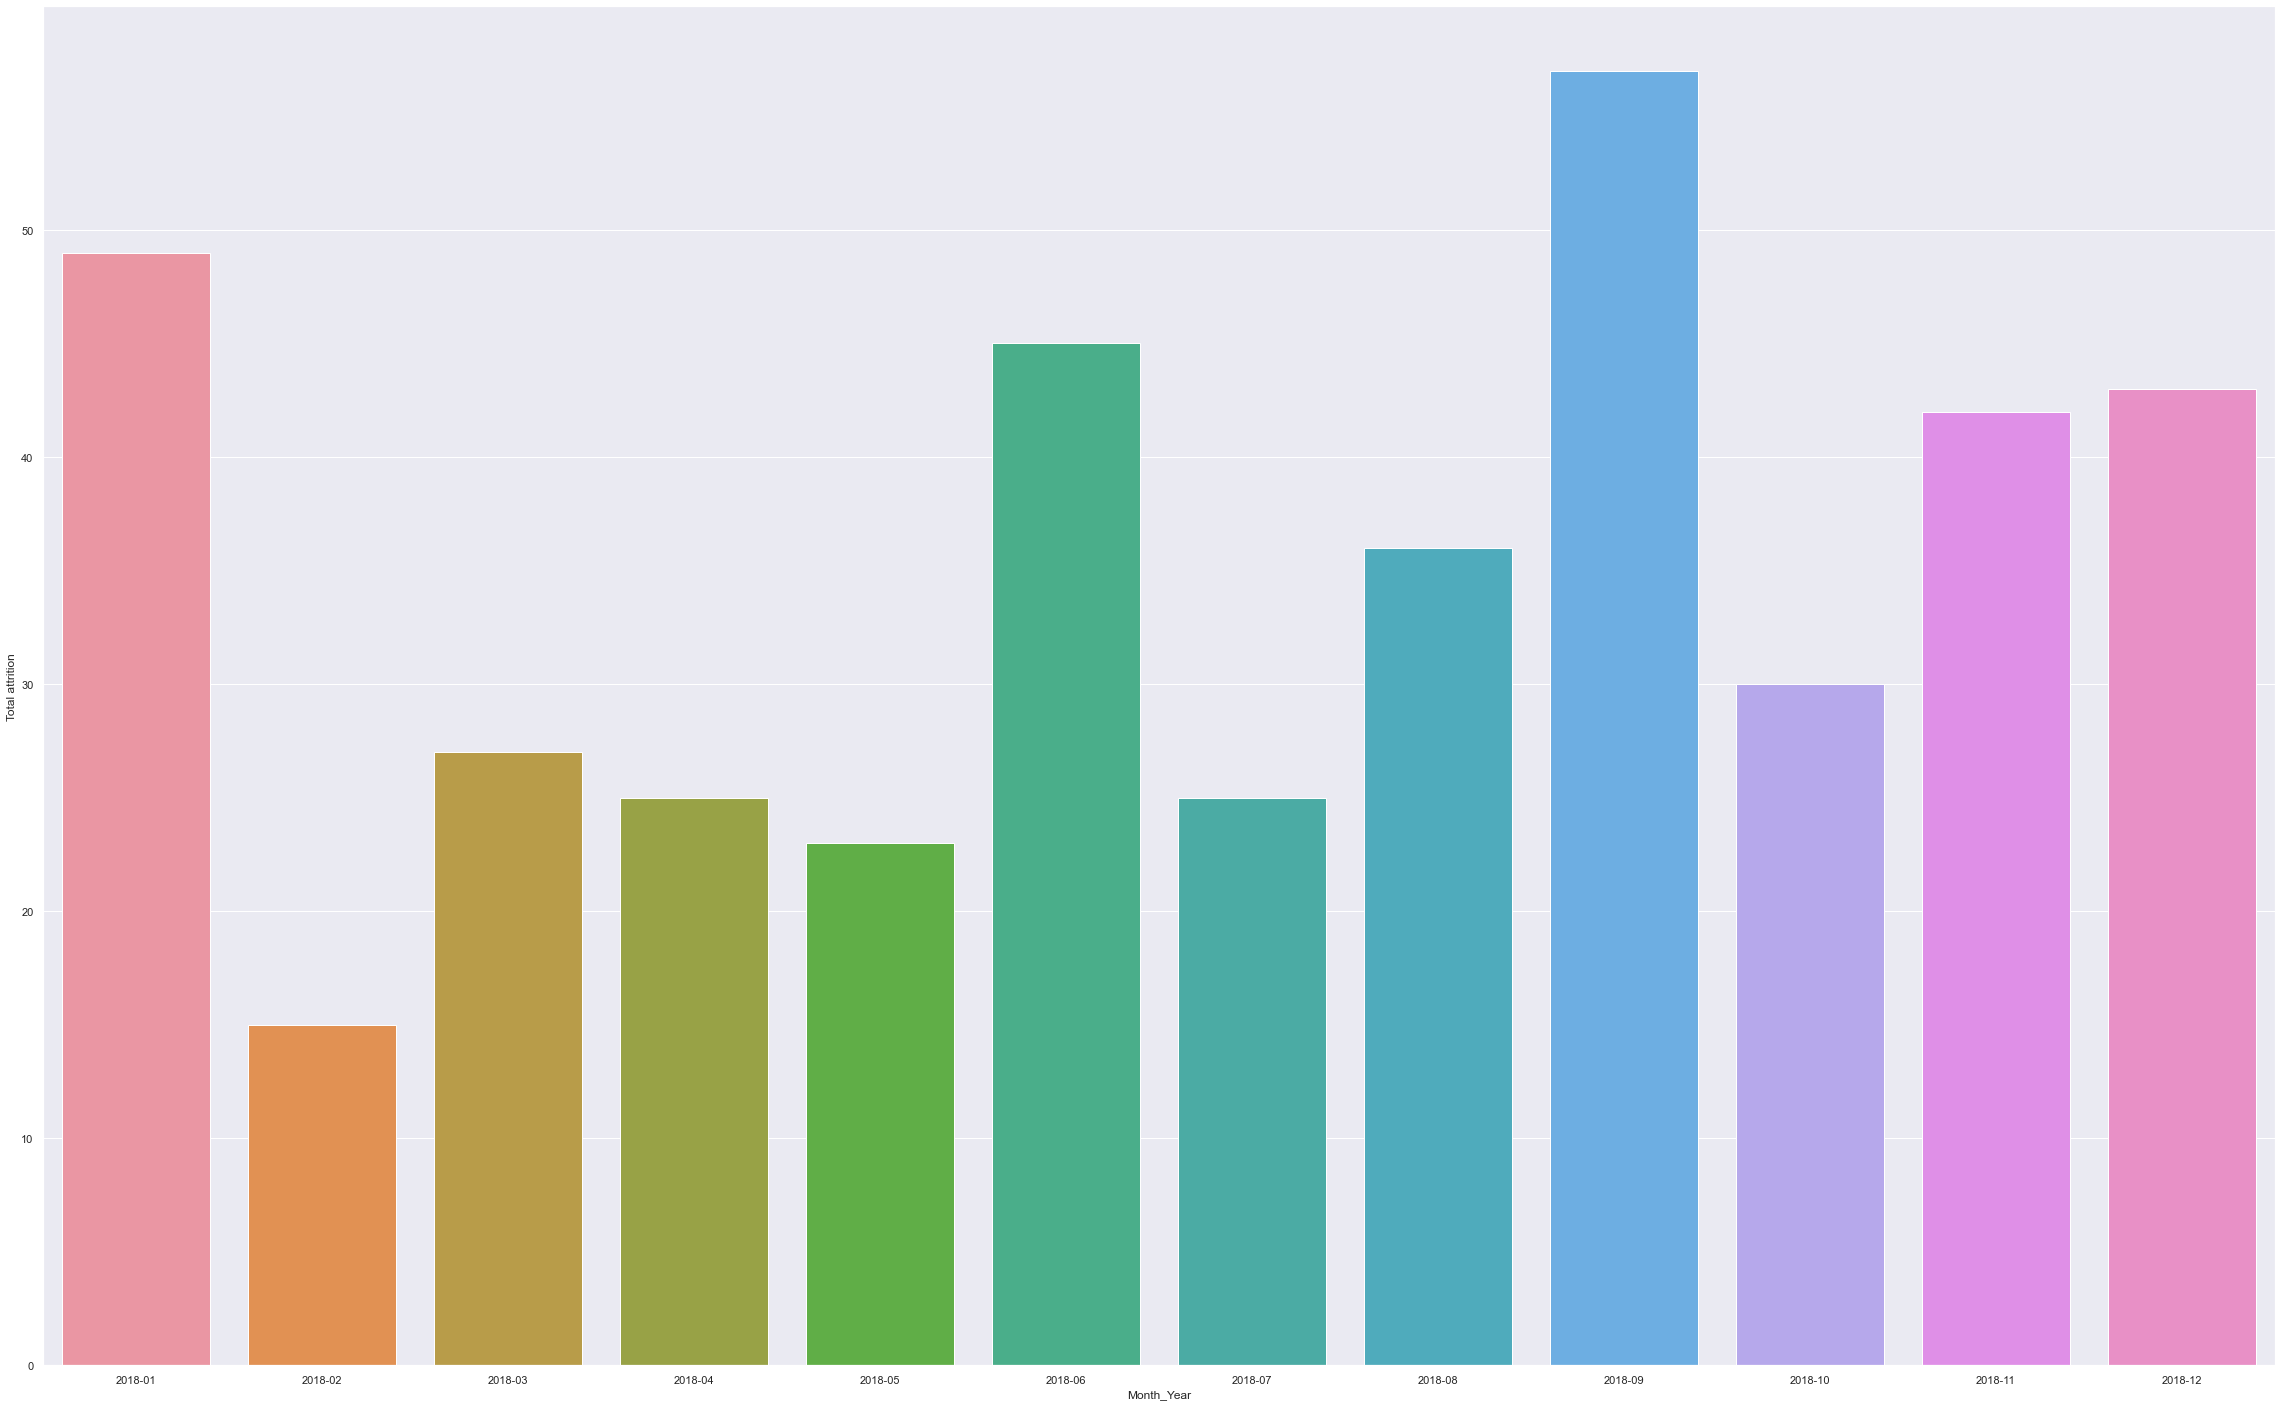

In [38]:
plt.figure(figsize=(40,25))
sns.barplot(x = 'Month_Year',y='Total attrition',data = df_date_2018 )

<AxesSubplot:xlabel='Skill', ylabel='Total attrition'>

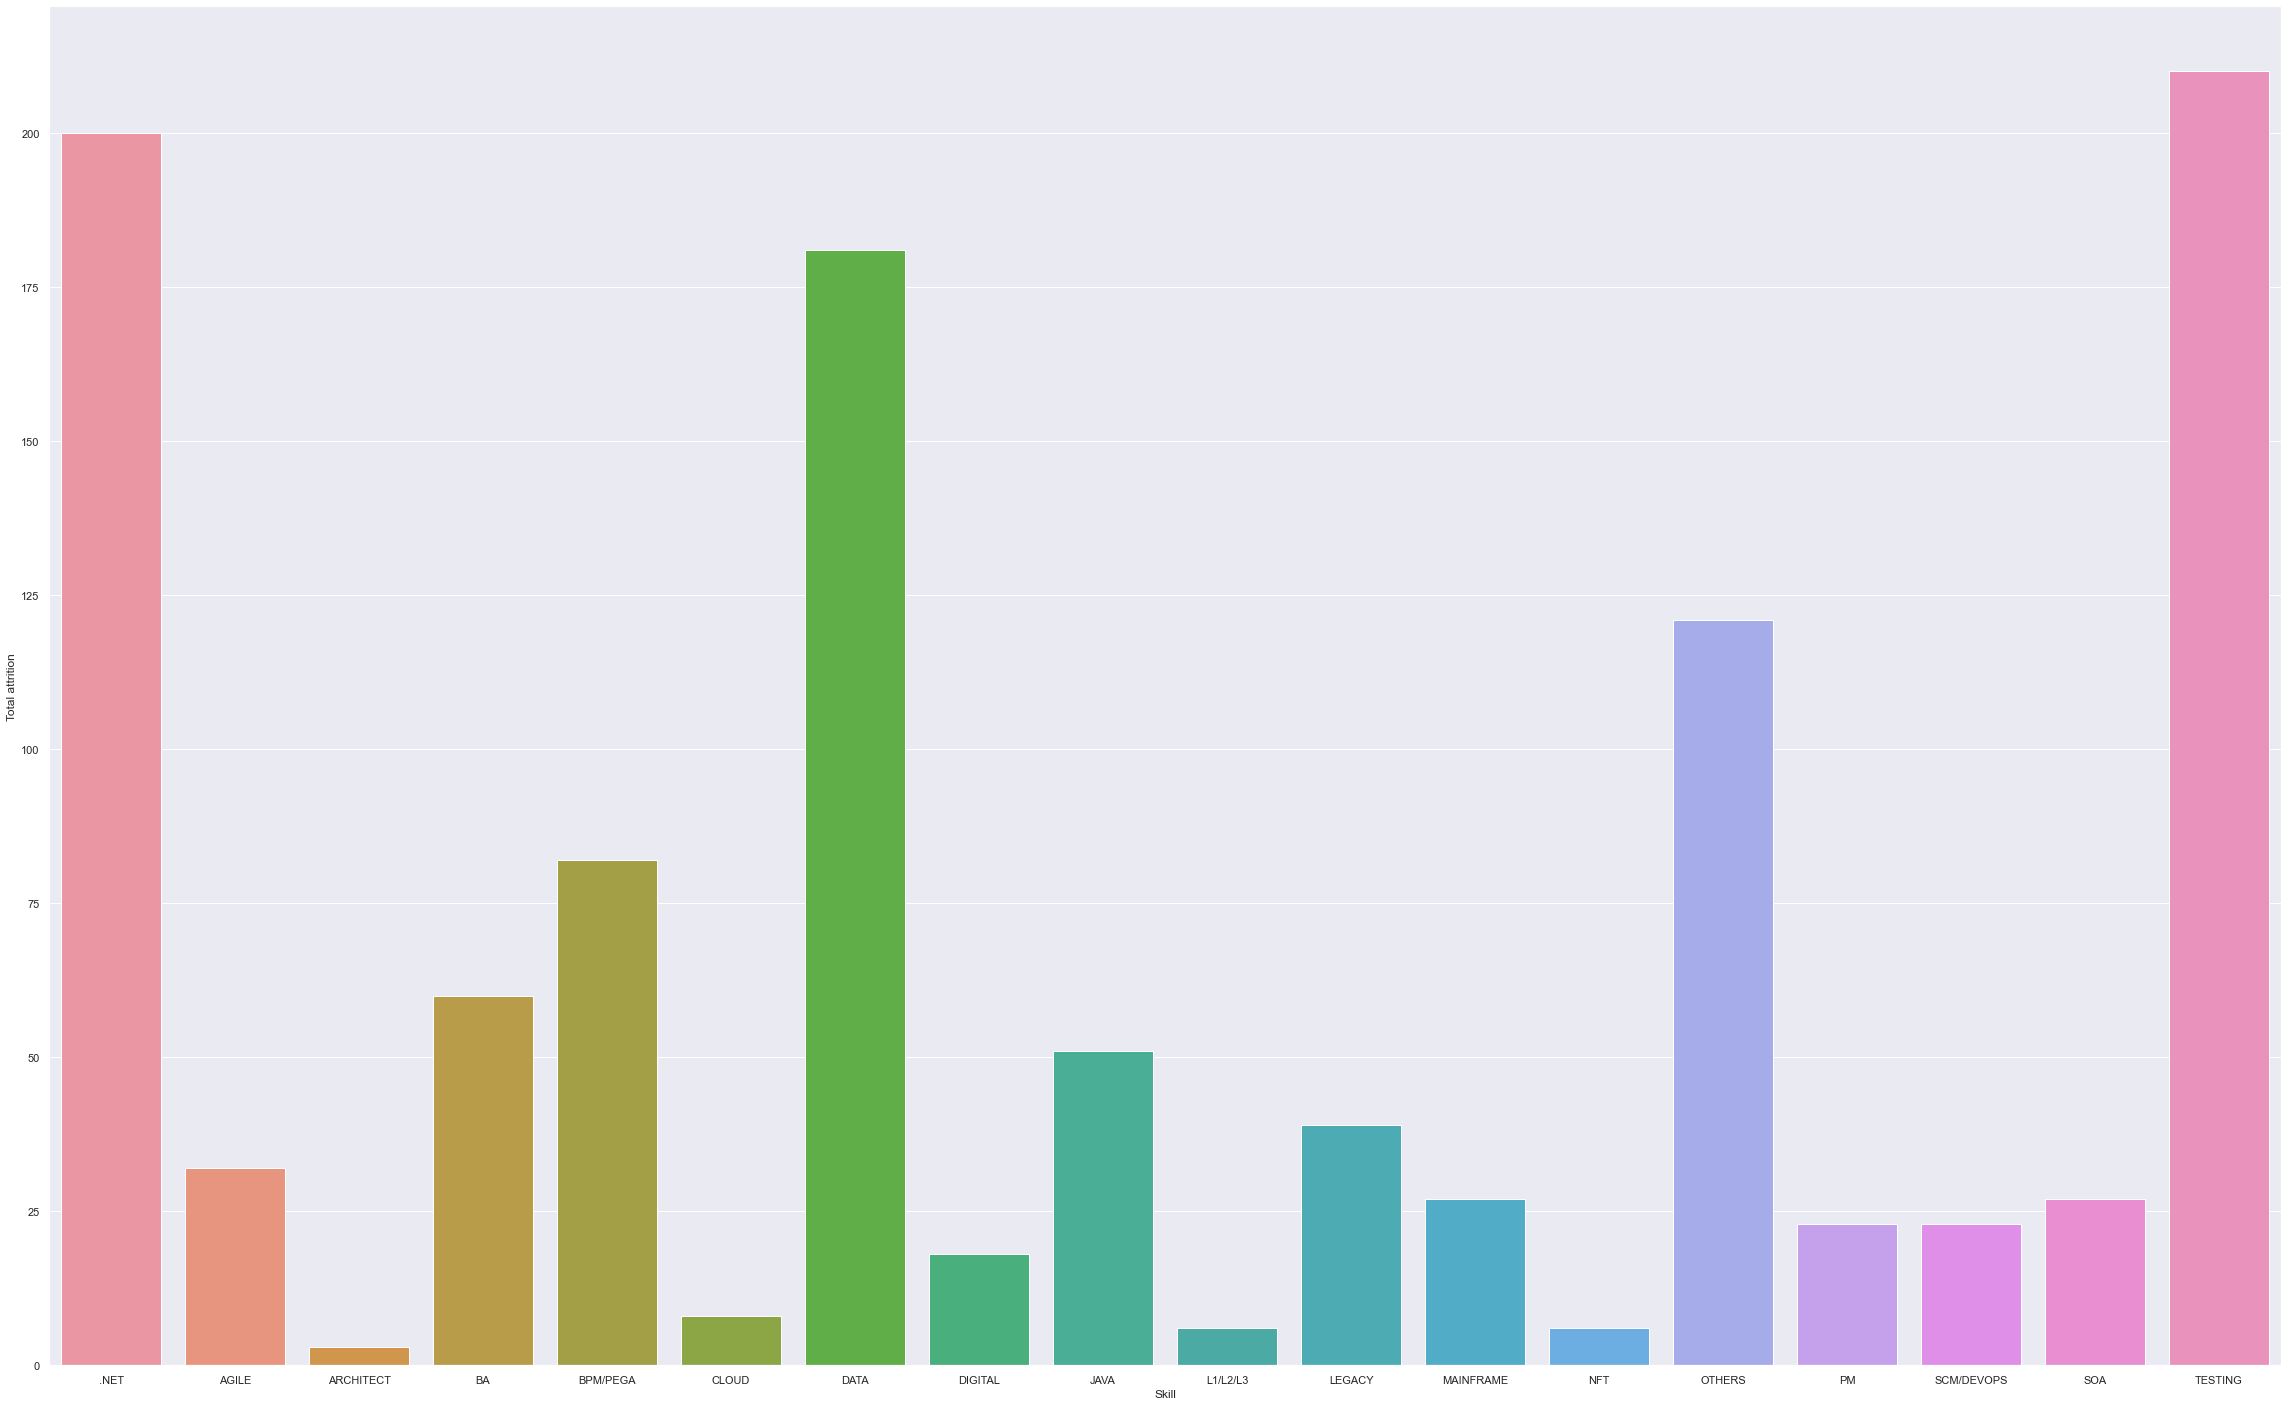

In [39]:
plt.figure(figsize=(40,25))
sns.barplot(x = 'Skill',y='Total attrition',data = df_skill_summary.reset_index() )

<AxesSubplot:xlabel='Month_Year', ylabel='Total attrition'>

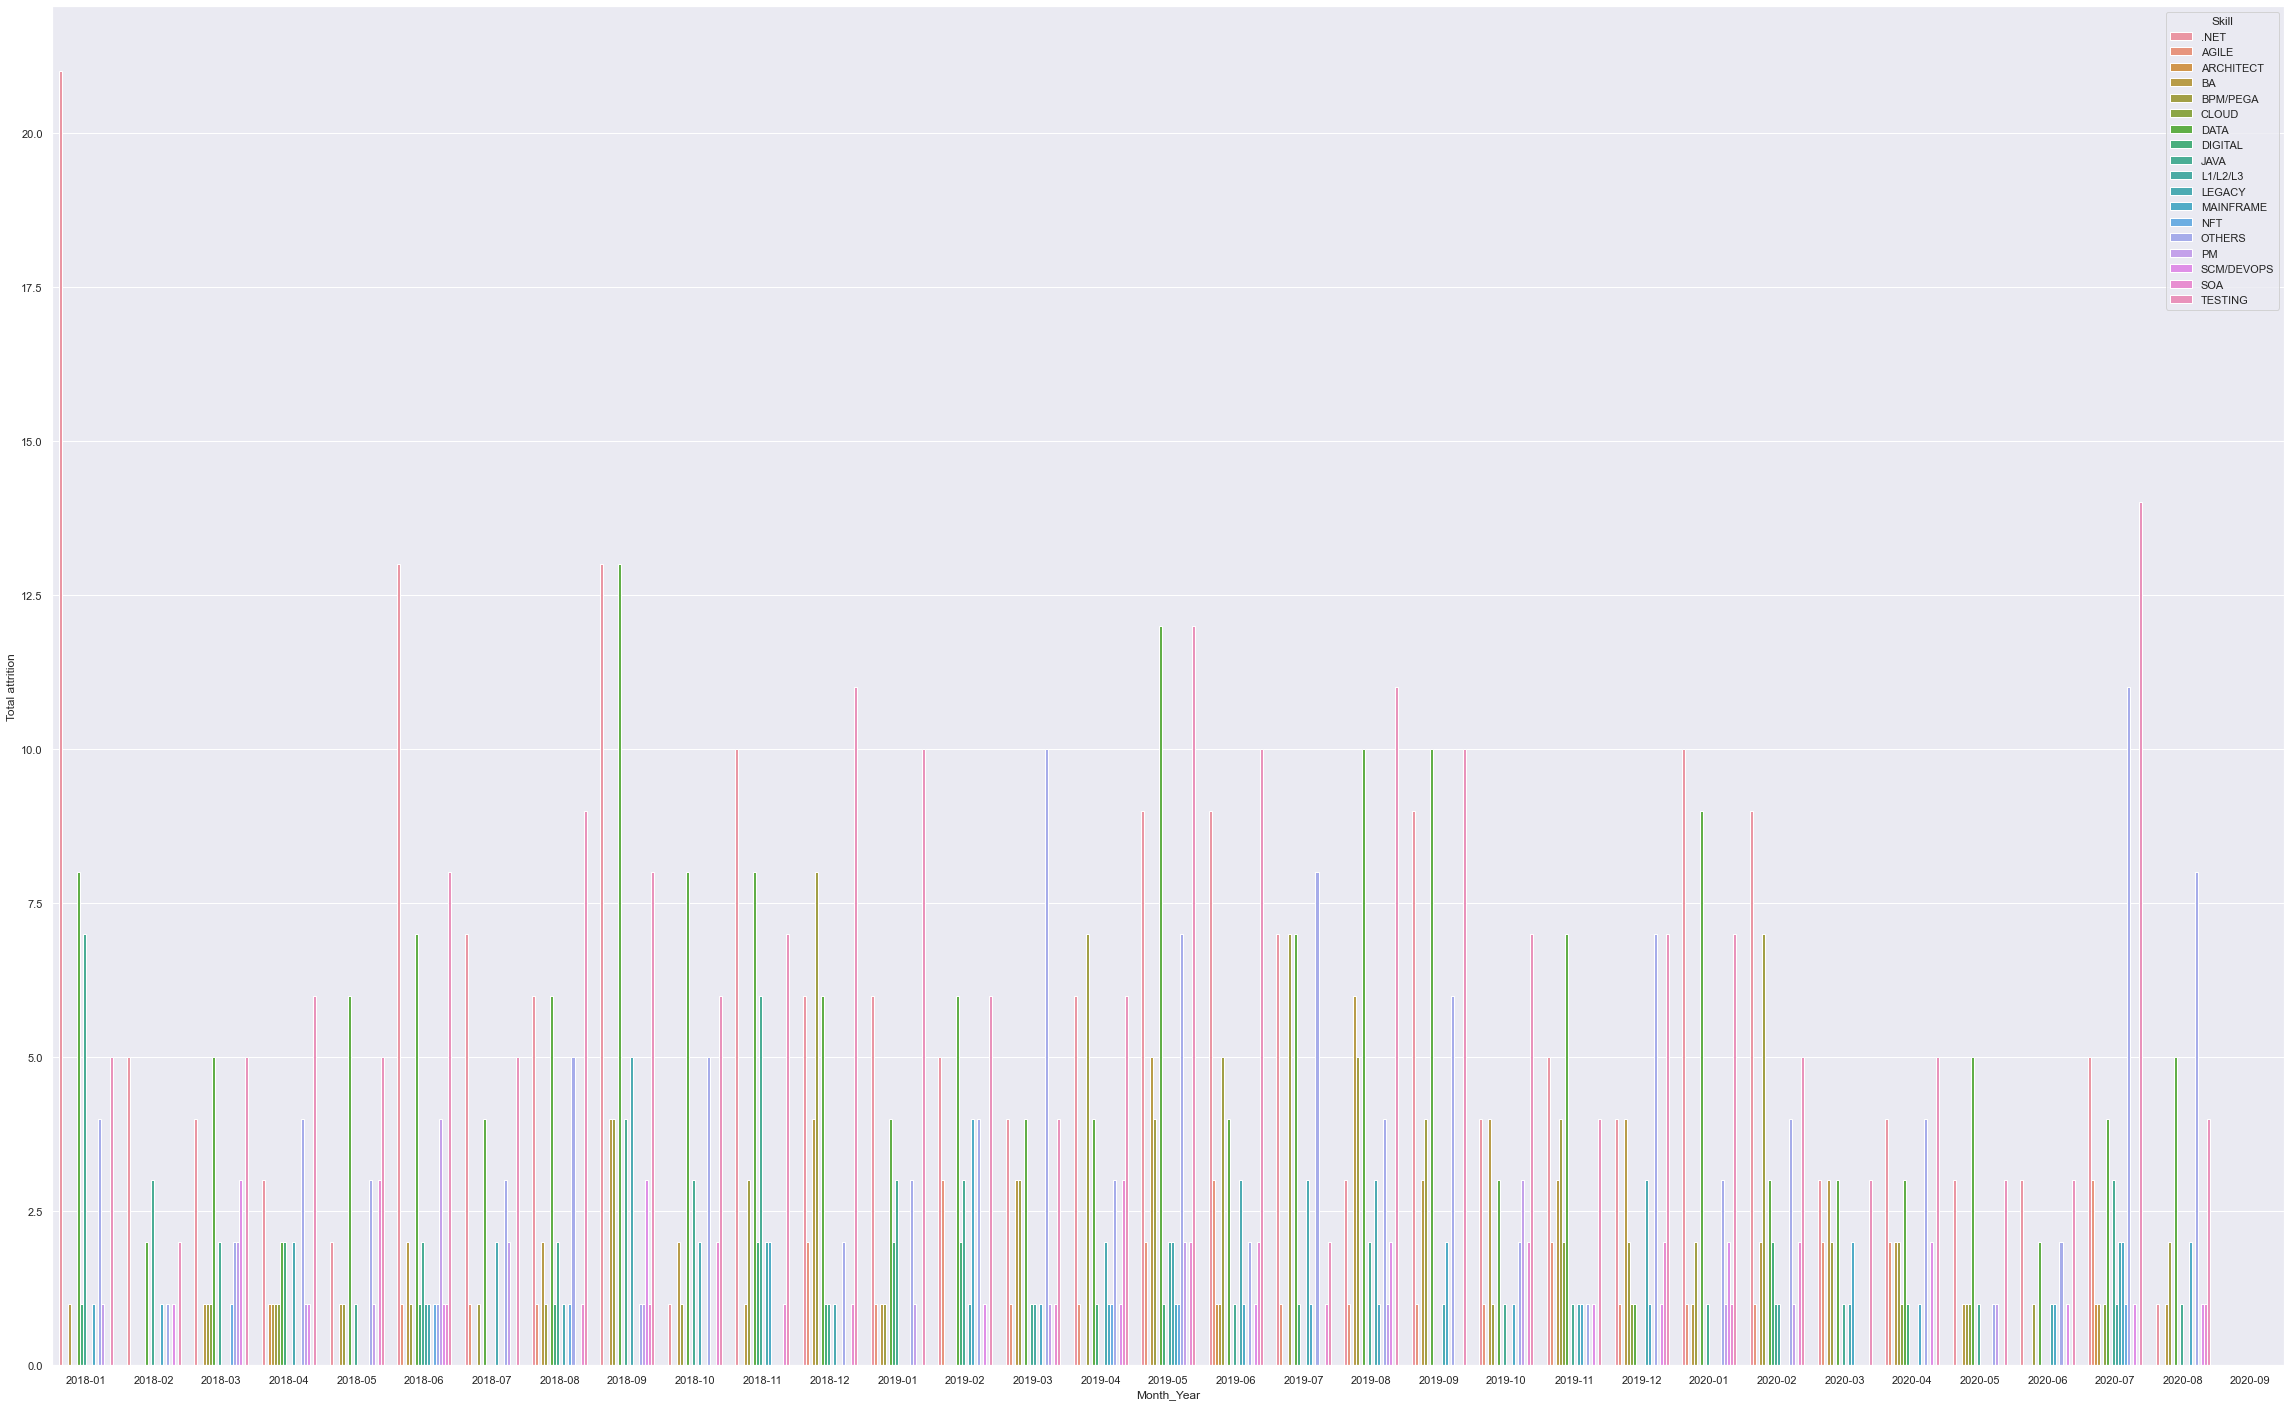

In [40]:
plt.figure(figsize=(40,25))
sns.barplot(x = 'Month_Year',y='Total attrition',data = df, hue='Skill' )

In [41]:
df.head()

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,2018-01
2,.NET,28-02-2018,119,5,2018-02-28,2018-02
3,.NET,31-03-2018,121,4,2018-03-31,2018-03
4,.NET,30-04-2018,165,3,2018-04-30,2018-04
5,.NET,31-05-2018,164,2,2018-05-31,2018-05


In [42]:
df_2018 = df[df['Month_Year'].str.contains('2018')]
df_2018

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,2018-01
2,.NET,28-02-2018,119,5,2018-02-28,2018-02
3,.NET,31-03-2018,121,4,2018-03-31,2018-03
4,.NET,30-04-2018,165,3,2018-04-30,2018-04
5,.NET,31-05-2018,164,2,2018-05-31,2018-05
...,...,...,...,...,...,...
568,TESTING,31-08-2018,193,9,2018-08-31,2018-08
569,TESTING,30-09-2018,187,8,2018-09-30,2018-09
570,TESTING,31-10-2018,178,6,2018-10-31,2018-10
571,TESTING,30-11-2018,174,7,2018-11-30,2018-11


In [43]:
df[df['Month_Year'] == "2018-01"]

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,2018-01
34,AGILE,31-01-2018,4,0,2018-01-31,2018-01
67,ARCHITECT,31-01-2018,4,0,2018-01-31,2018-01
100,BA,31-01-2018,21,1,2018-01-31,2018-01
133,BPM/PEGA,31-01-2018,10,0,2018-01-31,2018-01
166,CLOUD,31-01-2018,2,0,2018-01-31,2018-01
198,DATA,31-01-2018,95,8,2018-01-31,2018-01
231,DIGITAL,31-01-2018,5,1,2018-01-31,2018-01
264,JAVA,31-01-2018,29,7,2018-01-31,2018-01
297,L1/L2/L3,31-01-2018,1,0,2018-01-31,2018-01


In [44]:
df_MonSkill_summary = df.groupby(["Month_Year","Skill"])["Total number of resources", "Total attrition"].sum()
df_MonSkill_summary

<ipython-input-44-f40b0c21161f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_MonSkill_summary = df.groupby(["Month_Year","Skill"])["Total number of resources", "Total attrition"].sum()


Total number of resources  Total attrition
Month_Year Skill                                                 
2018-01    .NET                              130               21
           AGILE                               4                0
           ARCHITECT                           4                0
           BA                                 21                1
           BPM/PEGA                           10                0
...                                          ...              ...
2020-09    OTHERS                            273                0
           PM                                 21                0
           SCM/DEVOPS                         23                0
           SOA                                13                0
           TESTING                           245                0

[593 rows x 2 columns]

In [45]:
df_MonSkill_summary = df_MonSkill_summary.reset_index()
df_MonSkill_summary

,Month_Year,Skill,Total number of resources,Total attrition
0,2018-01,.NET,130,21
1,2018-01,AGILE,4,0
2,2018-01,ARCHITECT,4,0
3,2018-01,BA,21,1
4,2018-01,BPM/PEGA,10,0
...,...,...,...,...
588,2020-09,OTHERS,273,0
589,2020-09,PM,21,0
590,2020-09,SCM/DEVOPS,23,0
591,2020-09,SOA,13,0


In [46]:
df_MonSkill_Jan2018 = df_MonSkill_summary[df_MonSkill_summary['Month_Year'] == '2018-01']

In [47]:
df_MonSkill_Jan2018

,Month_Year,Skill,Total number of resources,Total attrition
0,2018-01,.NET,130,21
1,2018-01,AGILE,4,0
2,2018-01,ARCHITECT,4,0
3,2018-01,BA,21,1
4,2018-01,BPM/PEGA,10,0
5,2018-01,CLOUD,2,0
6,2018-01,DATA,95,8
7,2018-01,DIGITAL,5,1
8,2018-01,JAVA,29,7
9,2018-01,L1/L2/L3,1,0


<AxesSubplot:xlabel='Month_Year', ylabel='Total attrition'>

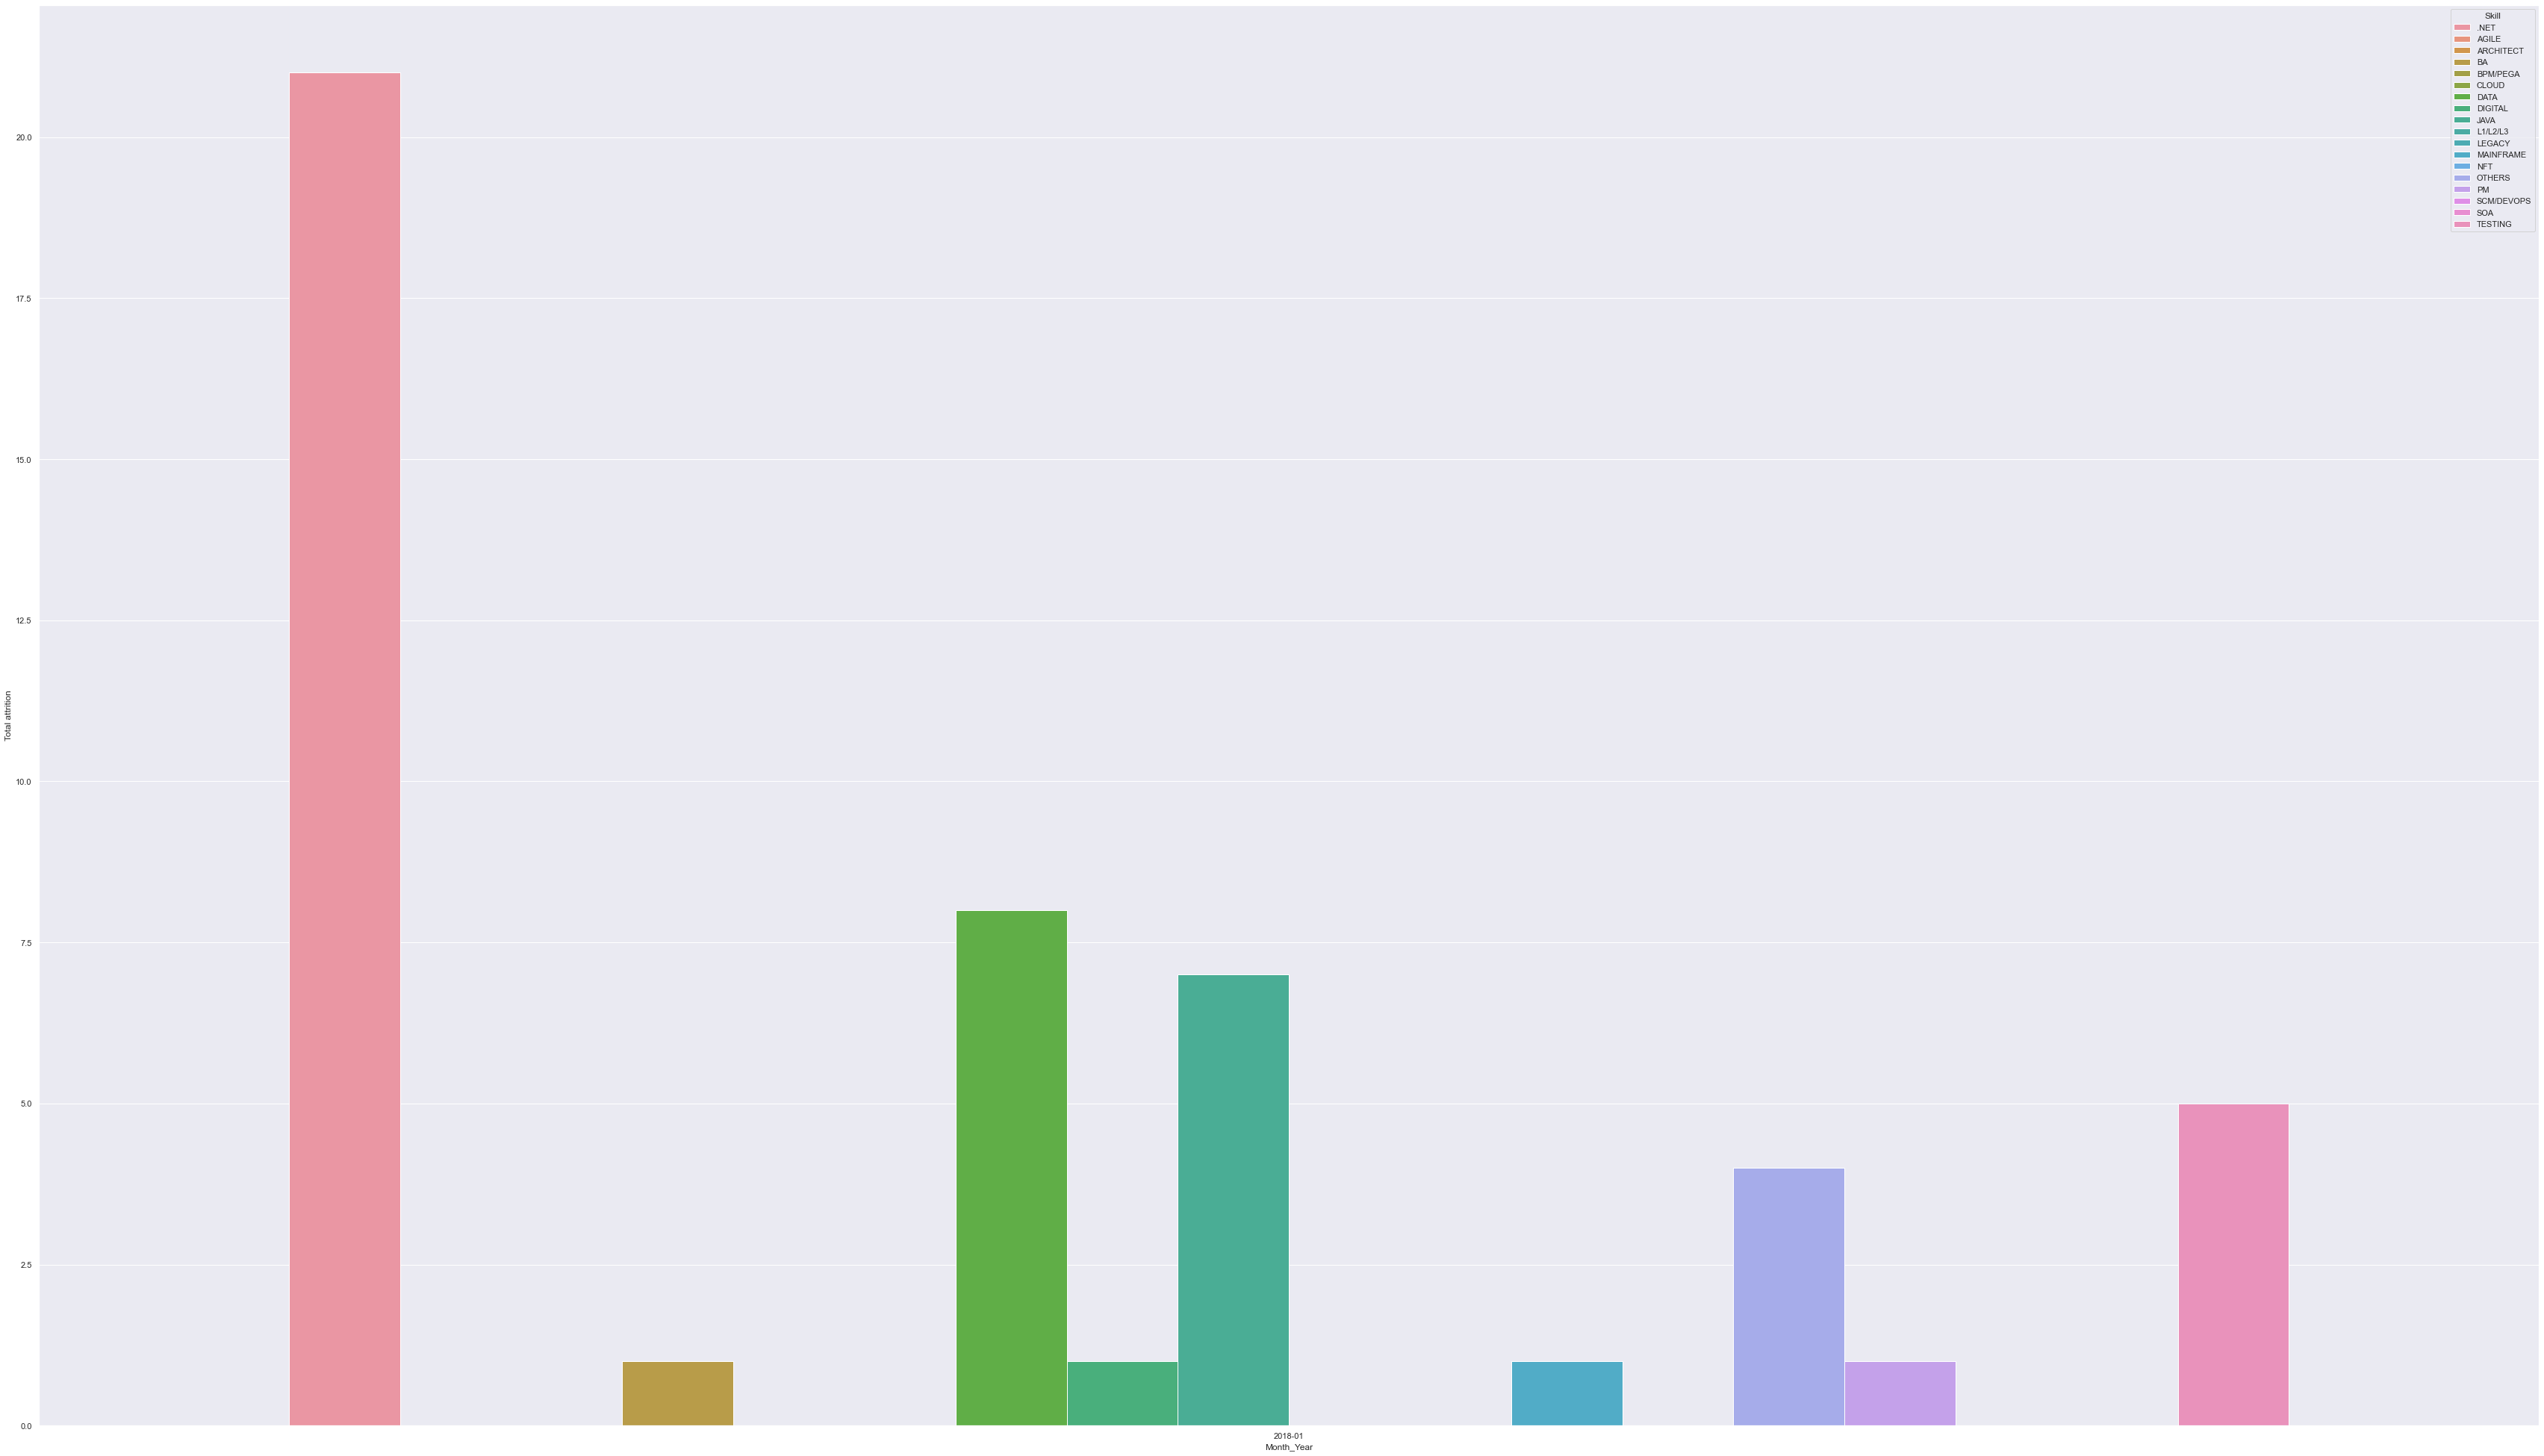

In [48]:
plt.figure(figsize=(60,35))
sns.barplot(x = 'Month_Year',y='Total attrition',data = df_MonSkill_Jan2018, hue='Skill' )

In [49]:
df_MonSkill_2018 = df_MonSkill_summary[df_MonSkill_summary['Month_Year'].str.contains('2018')]

In [50]:
df_MonSkill_2018

,Month_Year,Skill,Total number of resources,Total attrition
0,2018-01,.NET,130,21
1,2018-01,AGILE,4,0
2,2018-01,ARCHITECT,4,0
3,2018-01,BA,21,1
4,2018-01,BPM/PEGA,10,0
...,...,...,...,...
210,2018-12,OTHERS,77,2
211,2018-12,PM,16,0
212,2018-12,SCM/DEVOPS,9,0
213,2018-12,SOA,22,1


<AxesSubplot:xlabel='Month_Year', ylabel='Total attrition'>

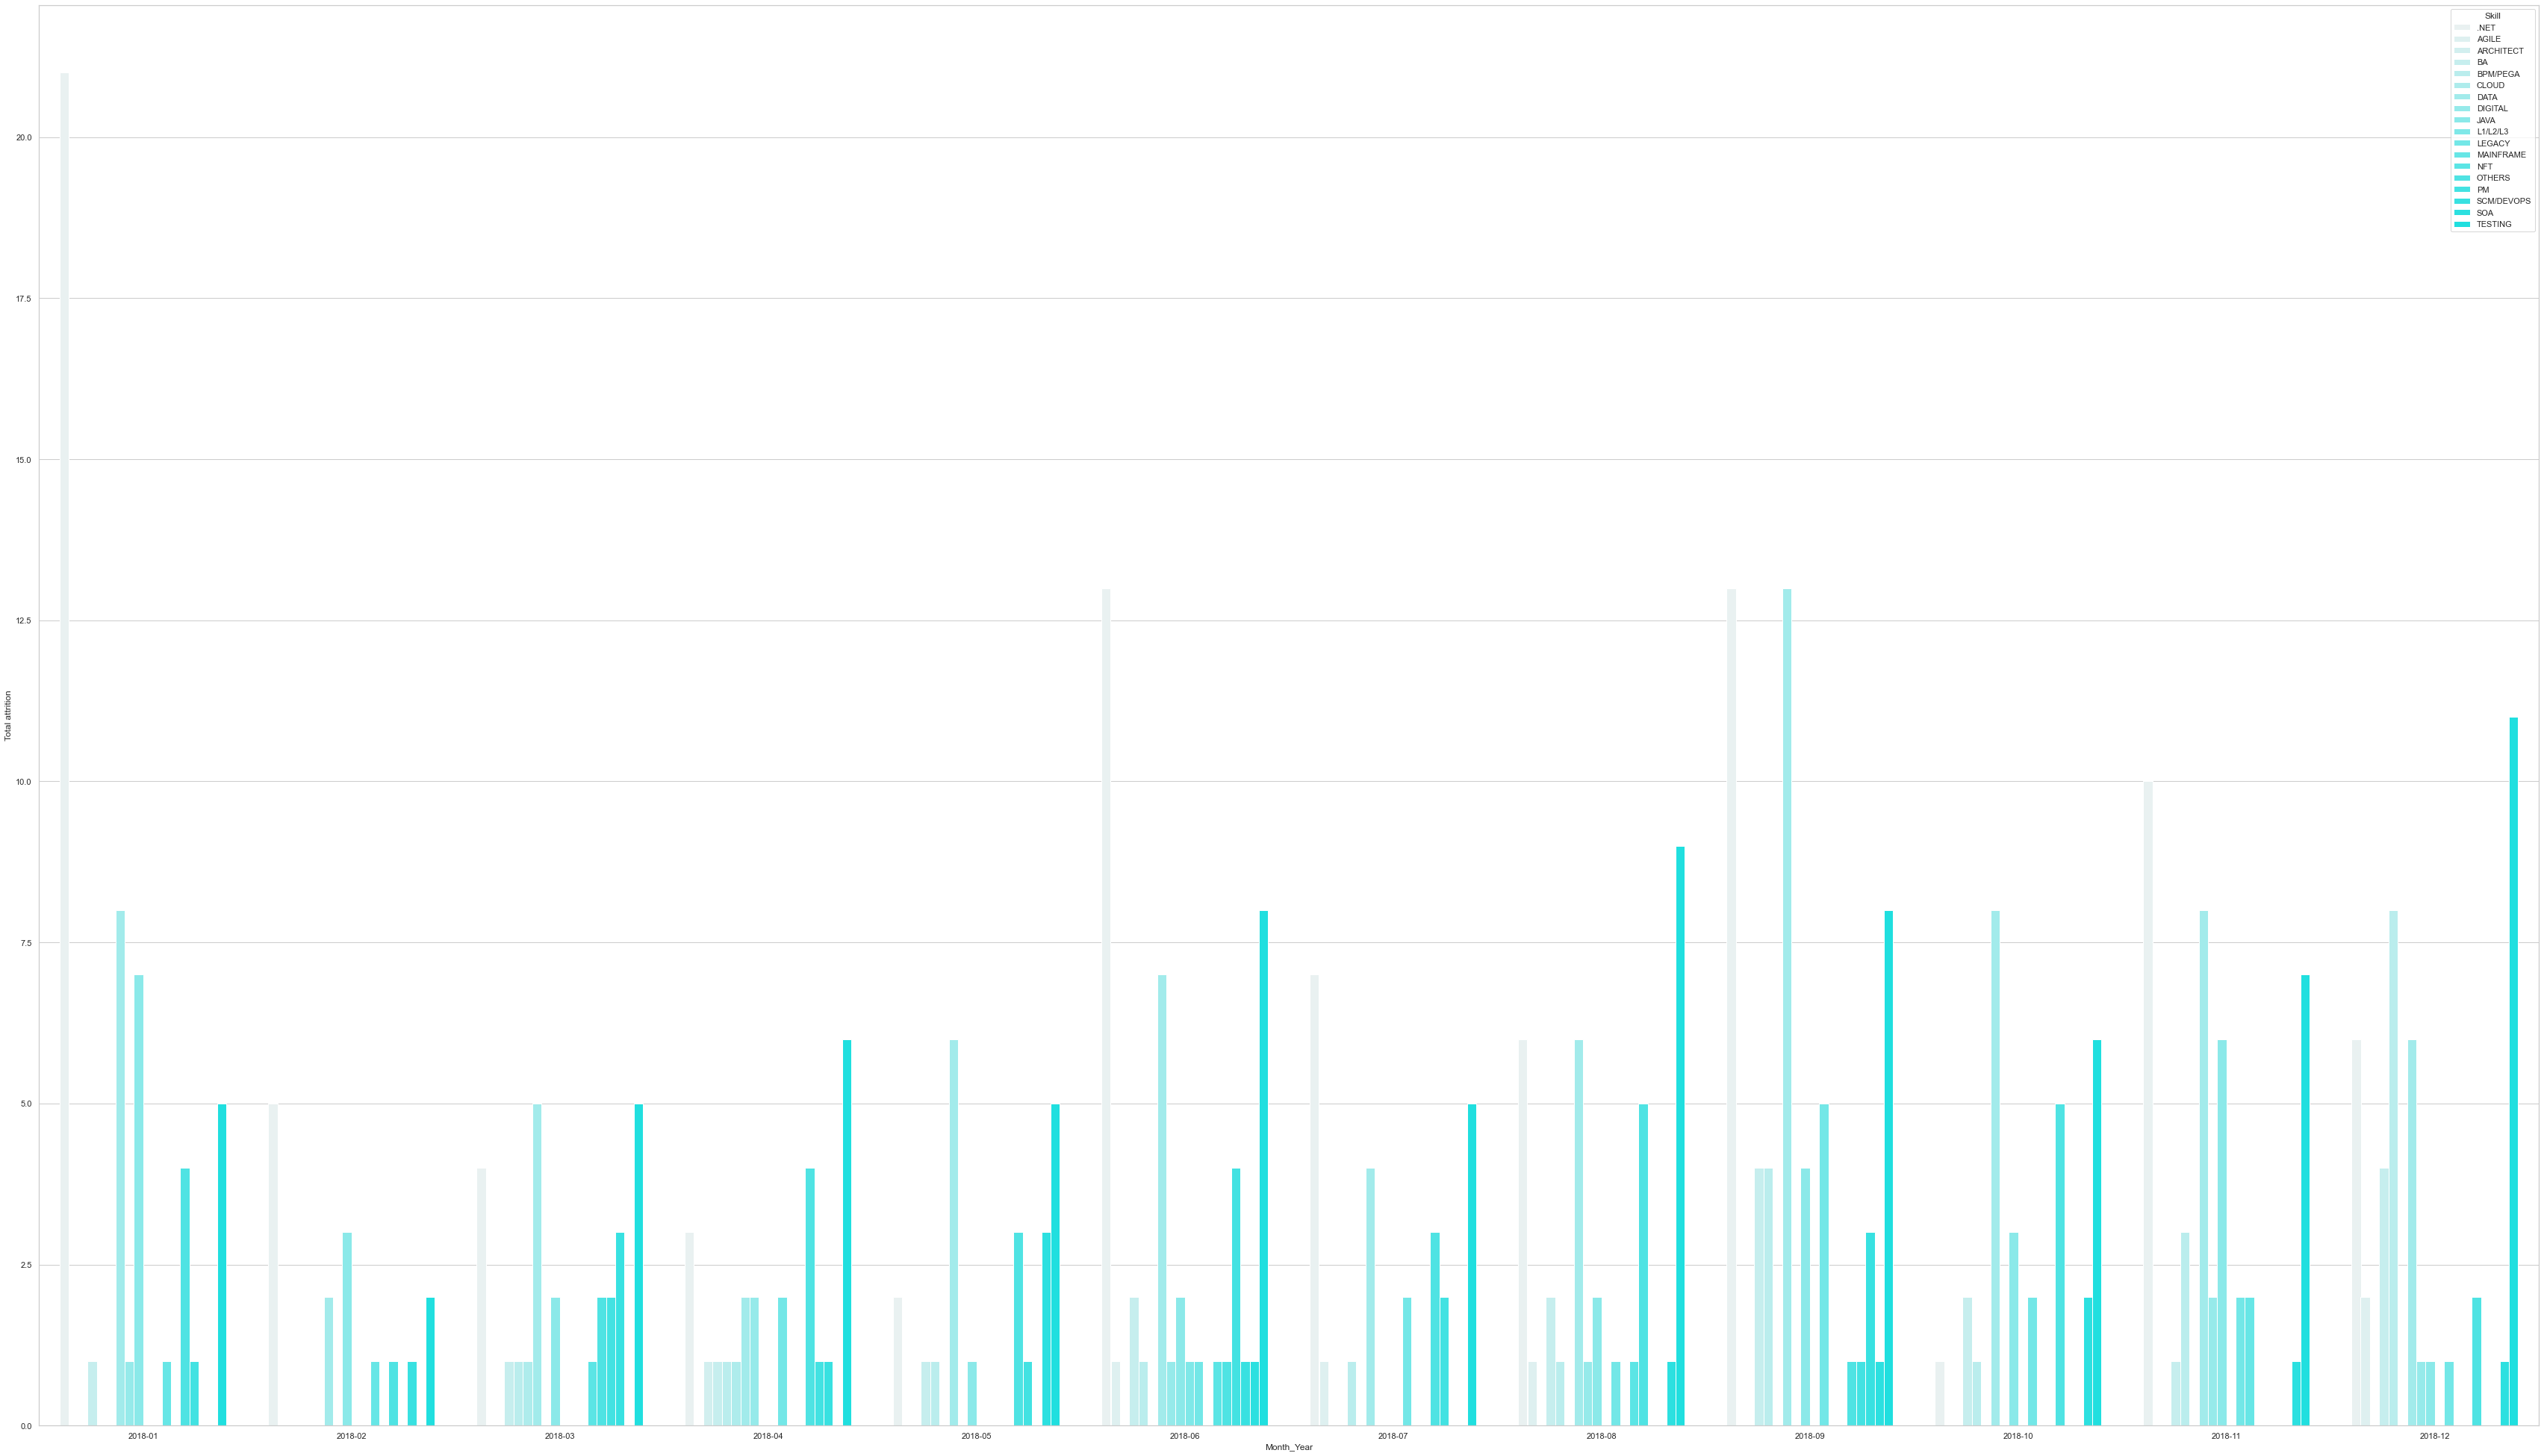

In [51]:
plt.figure(figsize=(60,35))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'Month_Year',y='Total attrition',data = df_MonSkill_2018, hue='Skill', color = 'cyan', ci = None )
#plt.savefig('TotalAttrition_2018vsSkill.png')

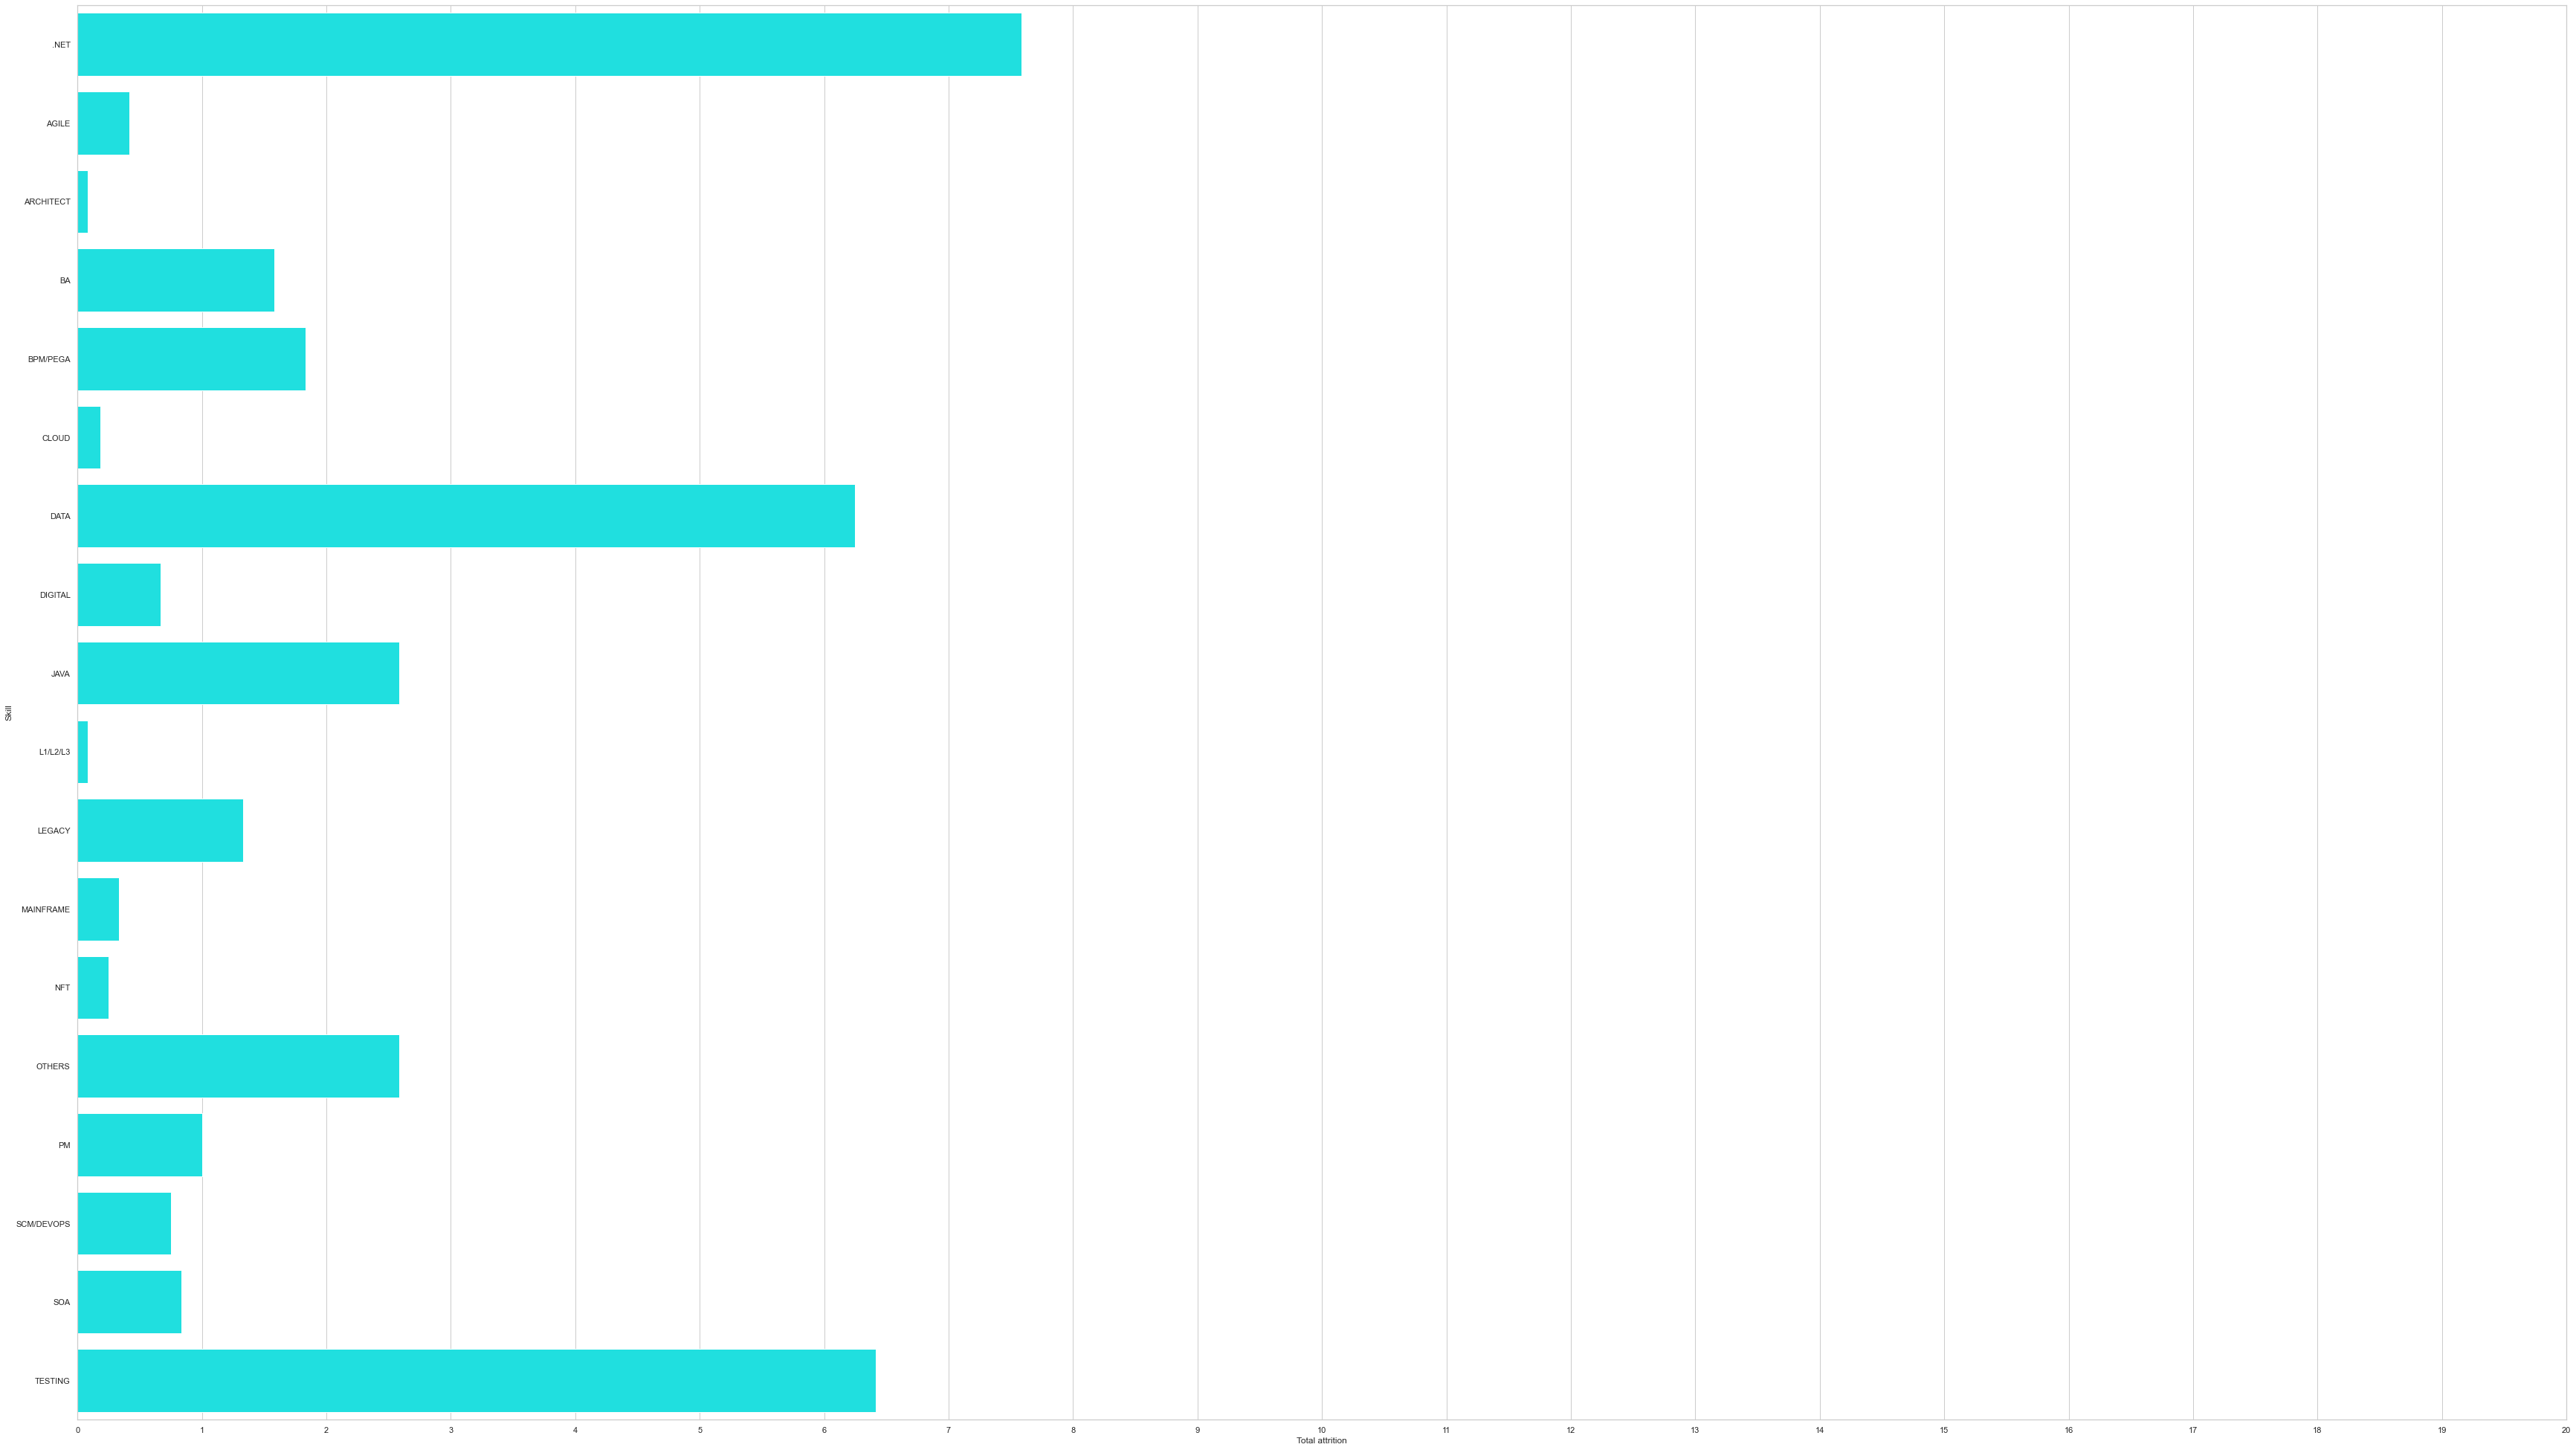

In [52]:
plt.figure(figsize=(60,35))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = 'Total attrition',y='Skill',data = df_MonSkill_2018, color = 'cyan', ci = None, orient = 'h')
g.set_xticks(range(df_MonSkill_2018['Total attrition'].max()))
#g.set_xticklabels([])
#plt.savefig('TotalAttrition_2018vsSkill.png')

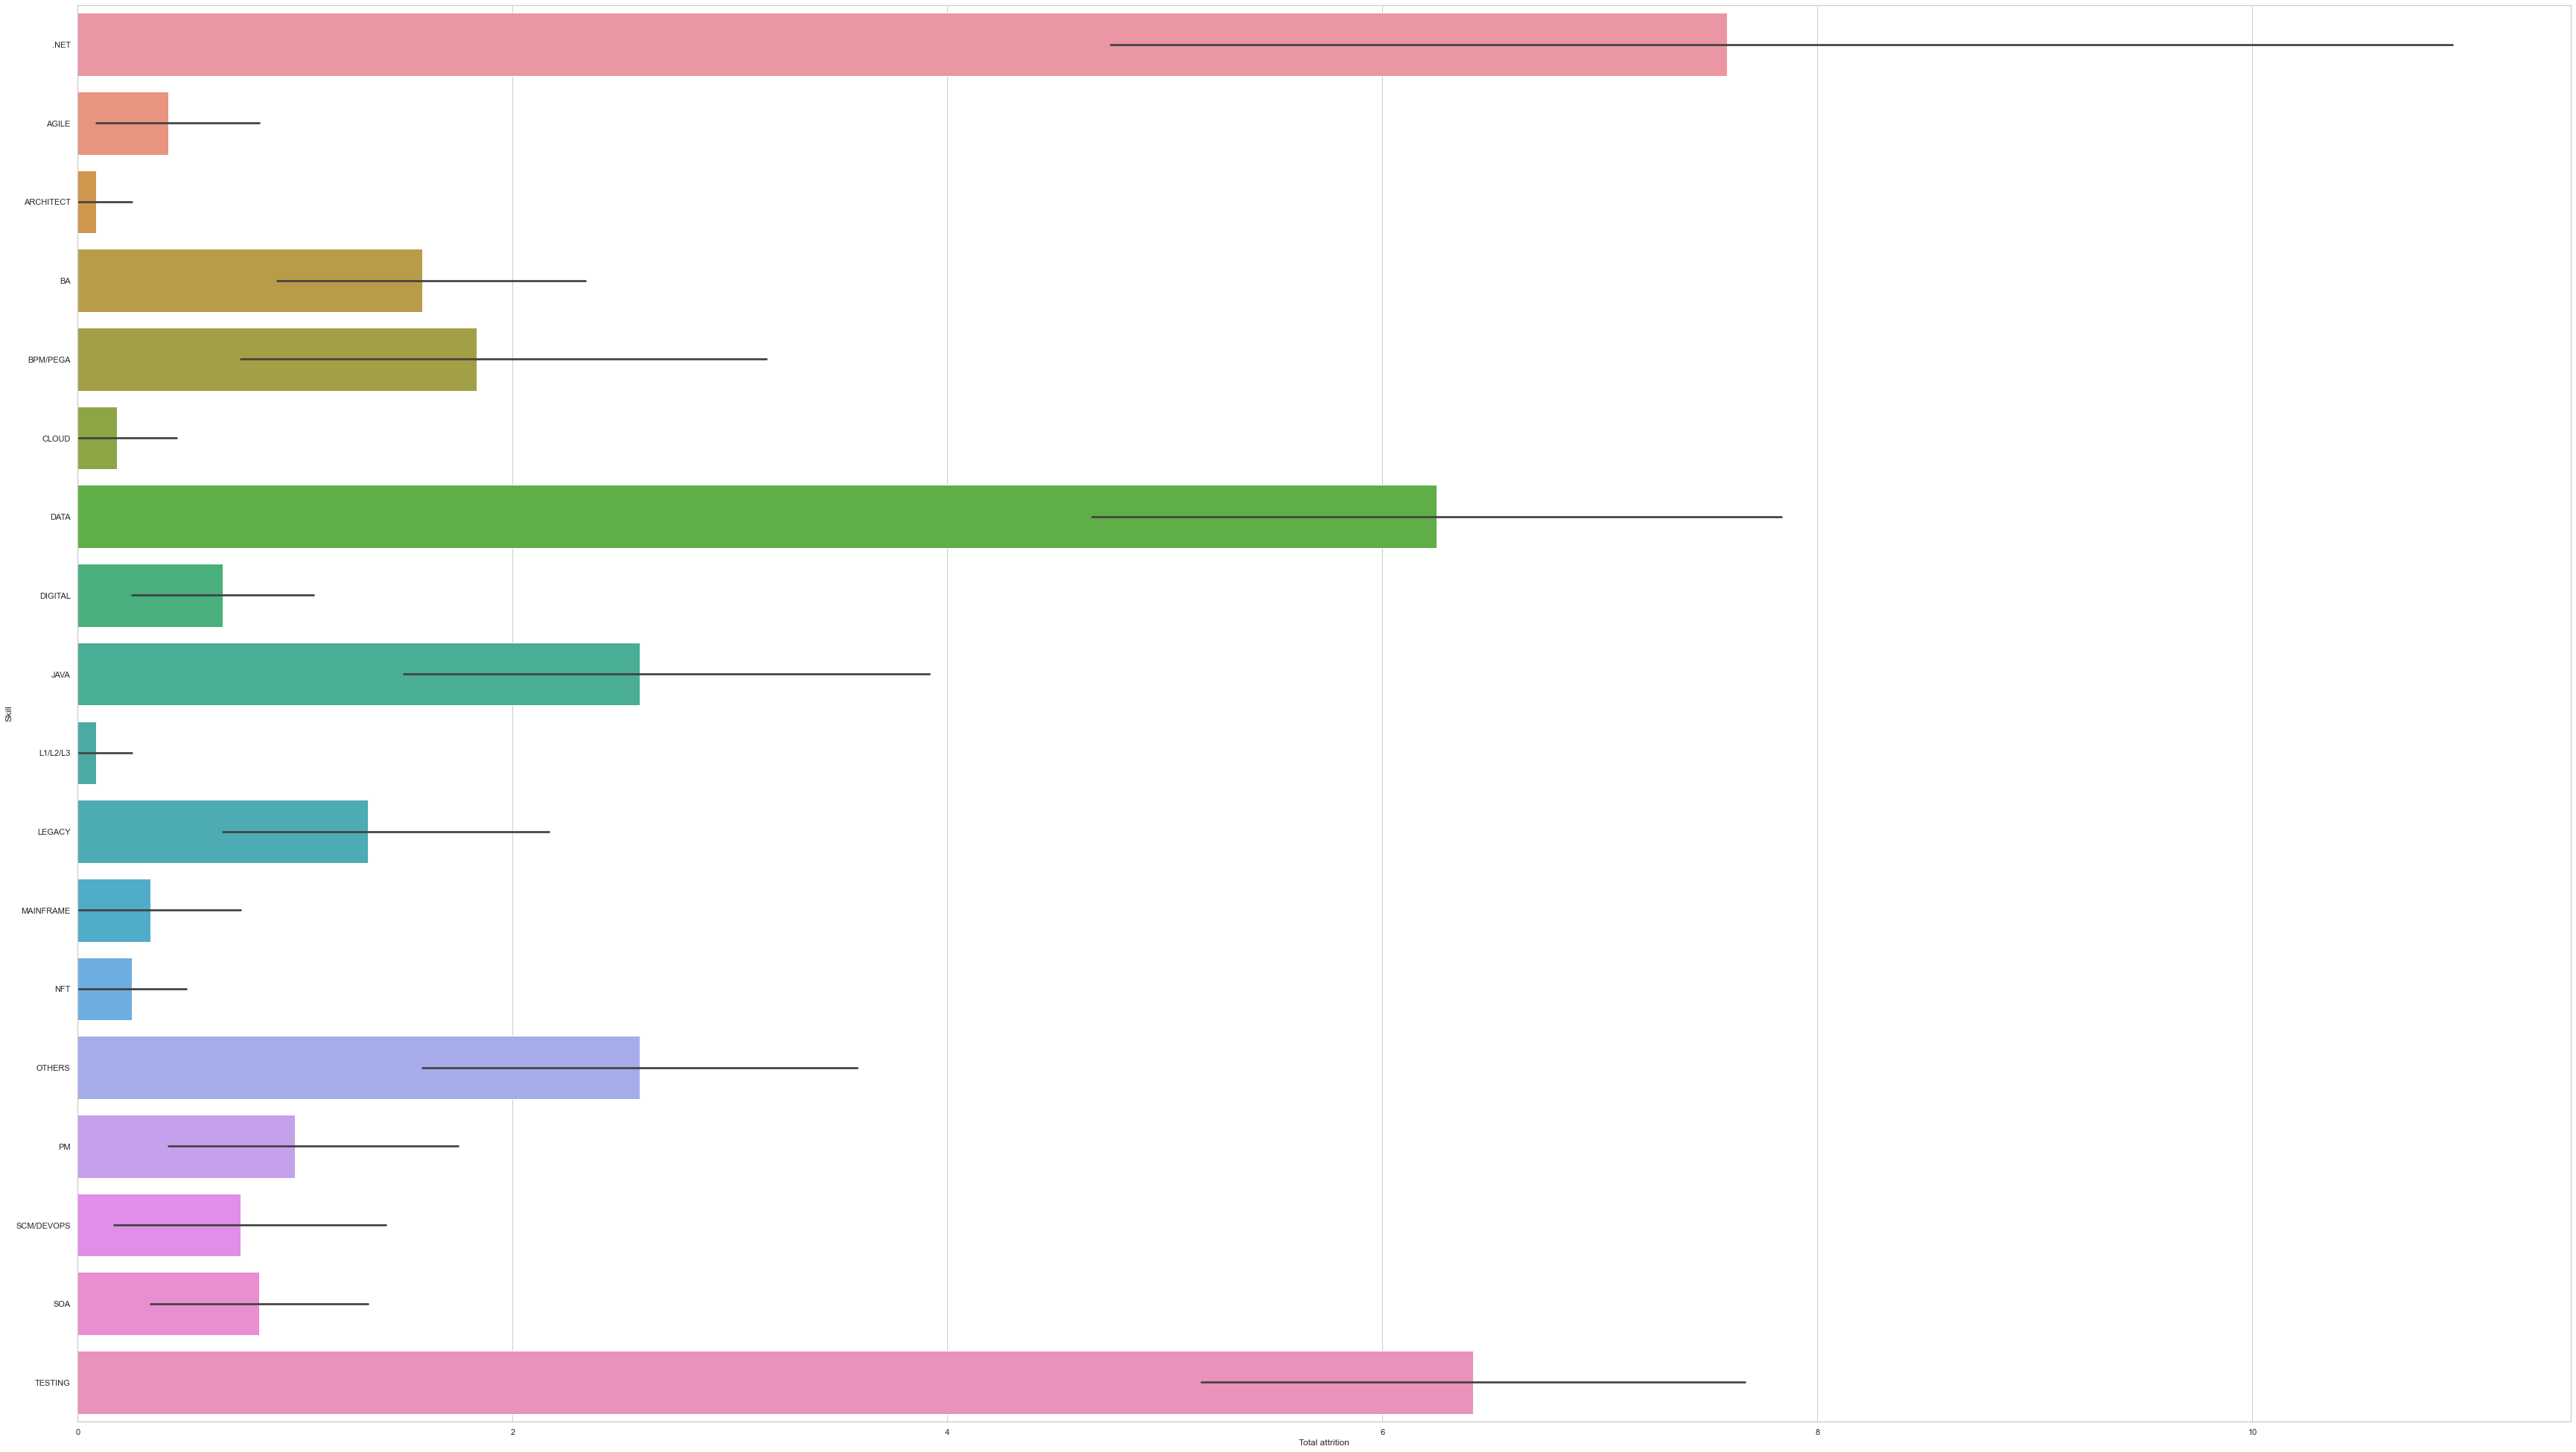

In [53]:
plt.figure(figsize=(60,35))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = 'Total attrition',y='Skill',data = df_MonSkill_2018)

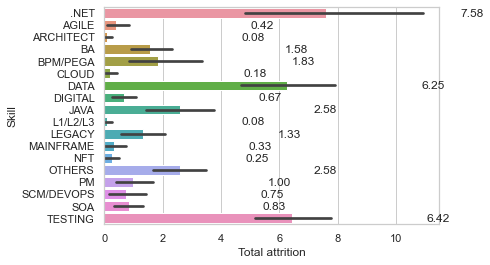

In [54]:
ax=sns.barplot(x = 'Total attrition',y='Skill',data = df_MonSkill_2018)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

<Figure size 360x1440 with 0 Axes>

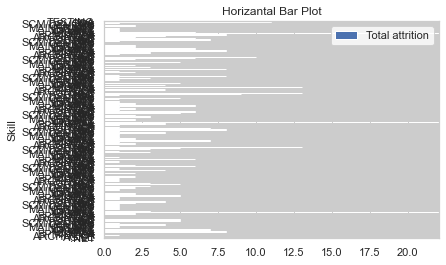

In [55]:
plt.figure(figsize=(5, 20))
ax = df_MonSkill_2018.plot.barh(y = 'Total attrition',x='Skill')
plt.title("Horizantal Bar Plot")
plt.show()

<AxesSubplot:>

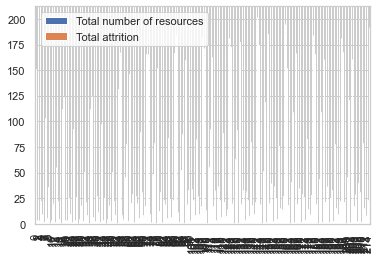

In [56]:
df_MonSkill_2018.plot.bar(stacked=True)

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


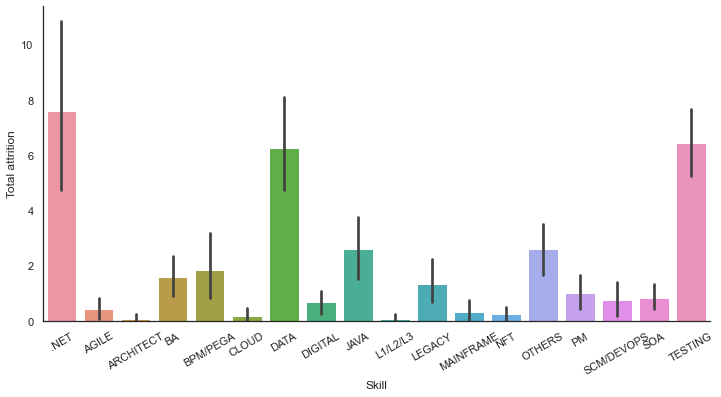

In [57]:
sns.set(style="white")
g = sns.factorplot(x='Skill'
                   ,y= 'Total attrition'
                   ,data=df_MonSkill_2018
                   ,kind='bar'
                   ,aspect=2
                   )
g.set_xticklabels(rotation=30);

In [58]:
df_2018 = df[df['Month_Year'].str.contains('2018')]

In [59]:
df_2018

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,2018-01
2,.NET,28-02-2018,119,5,2018-02-28,2018-02
3,.NET,31-03-2018,121,4,2018-03-31,2018-03
4,.NET,30-04-2018,165,3,2018-04-30,2018-04
5,.NET,31-05-2018,164,2,2018-05-31,2018-05
...,...,...,...,...,...,...
568,TESTING,31-08-2018,193,9,2018-08-31,2018-08
569,TESTING,30-09-2018,187,8,2018-09-30,2018-09
570,TESTING,31-10-2018,178,6,2018-10-31,2018-10
571,TESTING,30-11-2018,174,7,2018-11-30,2018-11


<ipython-input-60-8d7e161f96e1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 25)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan 2018'),
  Text(1, 0, 'Feb 2018'),
  Text(2, 0, 'Mar 2018'),
  Text(3, 0, 'Apr 2018'),
  Text(4, 0, 'May 2018'),
  Text(5, 0, 'Jun 2018'),
  Text(6, 0, 'Jul 2018'),
  Text(7, 0, 'Aug 2018'),
  Text(8, 0, 'Sep 2018'),
  Text(9, 0, 'Oct 2018'),
  Text(10, 0, 'Nov 2018'),
  Text(11, 0, 'Dec 2018')])

<Figure size 2880x2160 with 0 Axes>

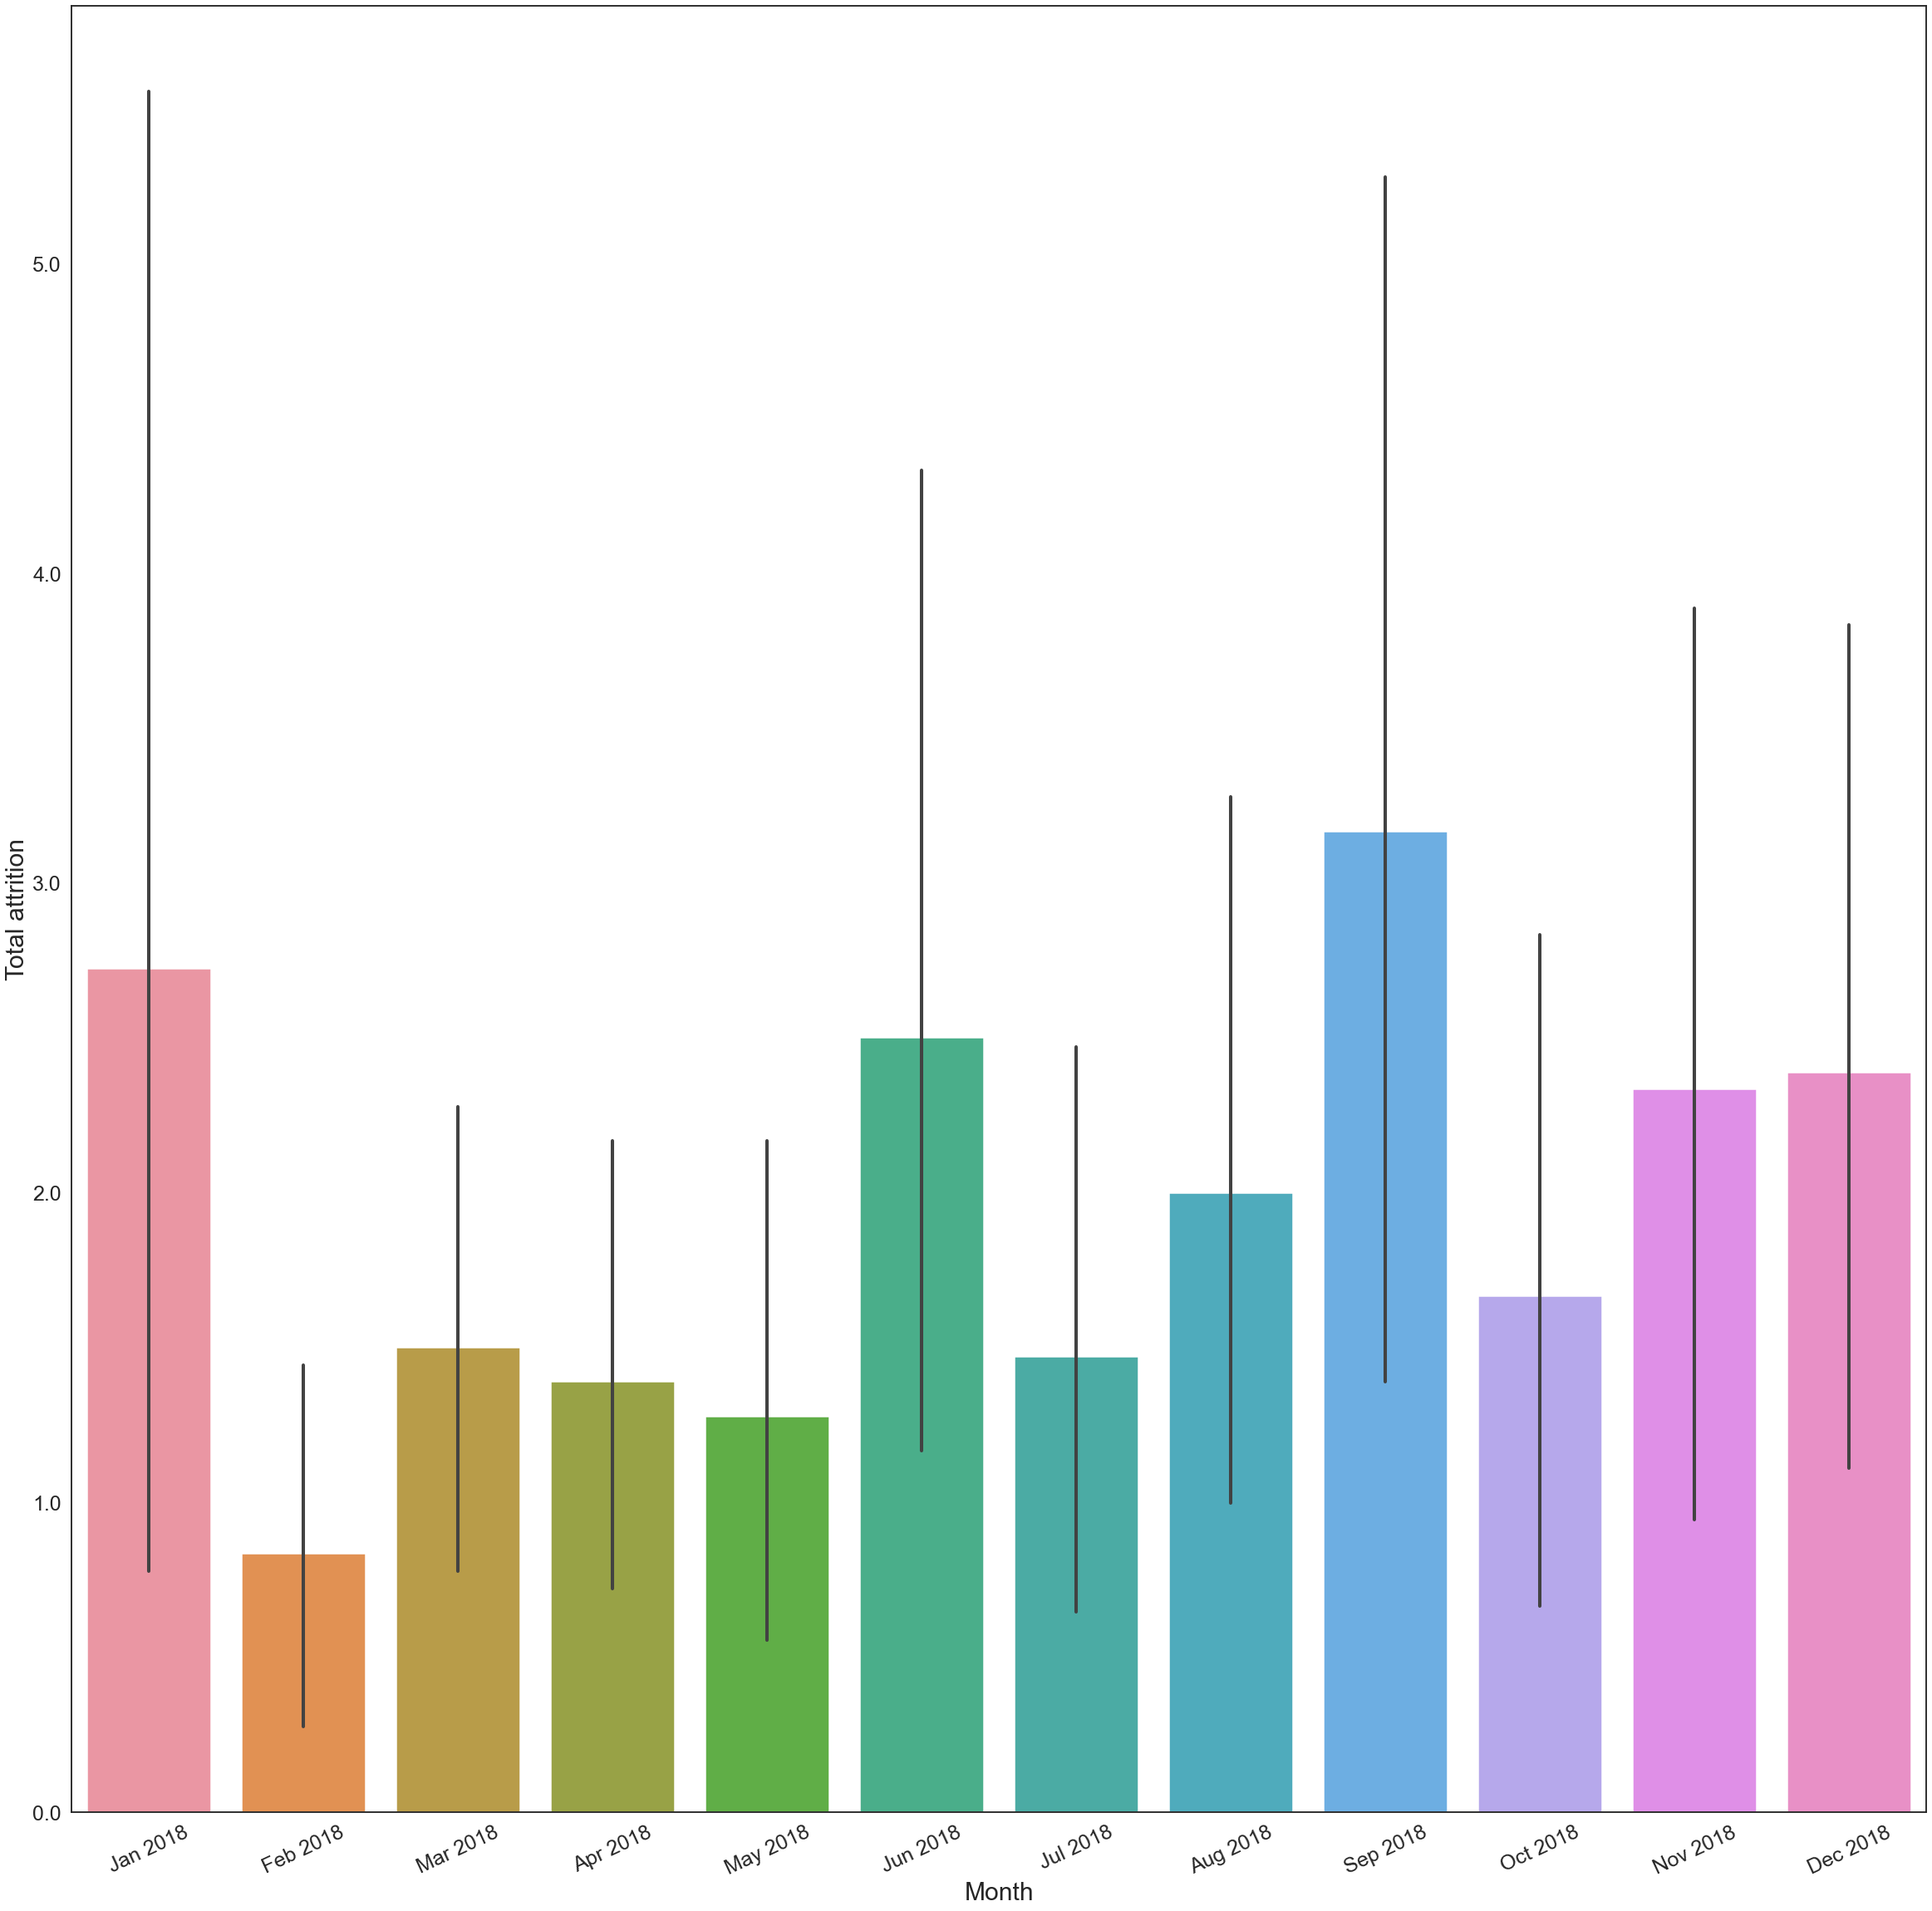

In [60]:
plt.figure(figsize=(40,30))
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(40,40))
b= sns.barplot(x = 'Month_Year',y='Total attrition',data = df_2018)
b.set_yticklabels(b.get_yticks(), size = 25)
_, ylabels = plt.yticks()

xlabels = ['Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Oct 2018',
             'Nov 2018','Dec 2018']
b.set_xticklabels(xlabels, size=25)
b.set_xlabel("Month",fontsize=30)
b.set_ylabel("Total attrition",fontsize=30)
plt.xticks(rotation = 25)

TypeError: text() missing 1 required positional argument: 's'

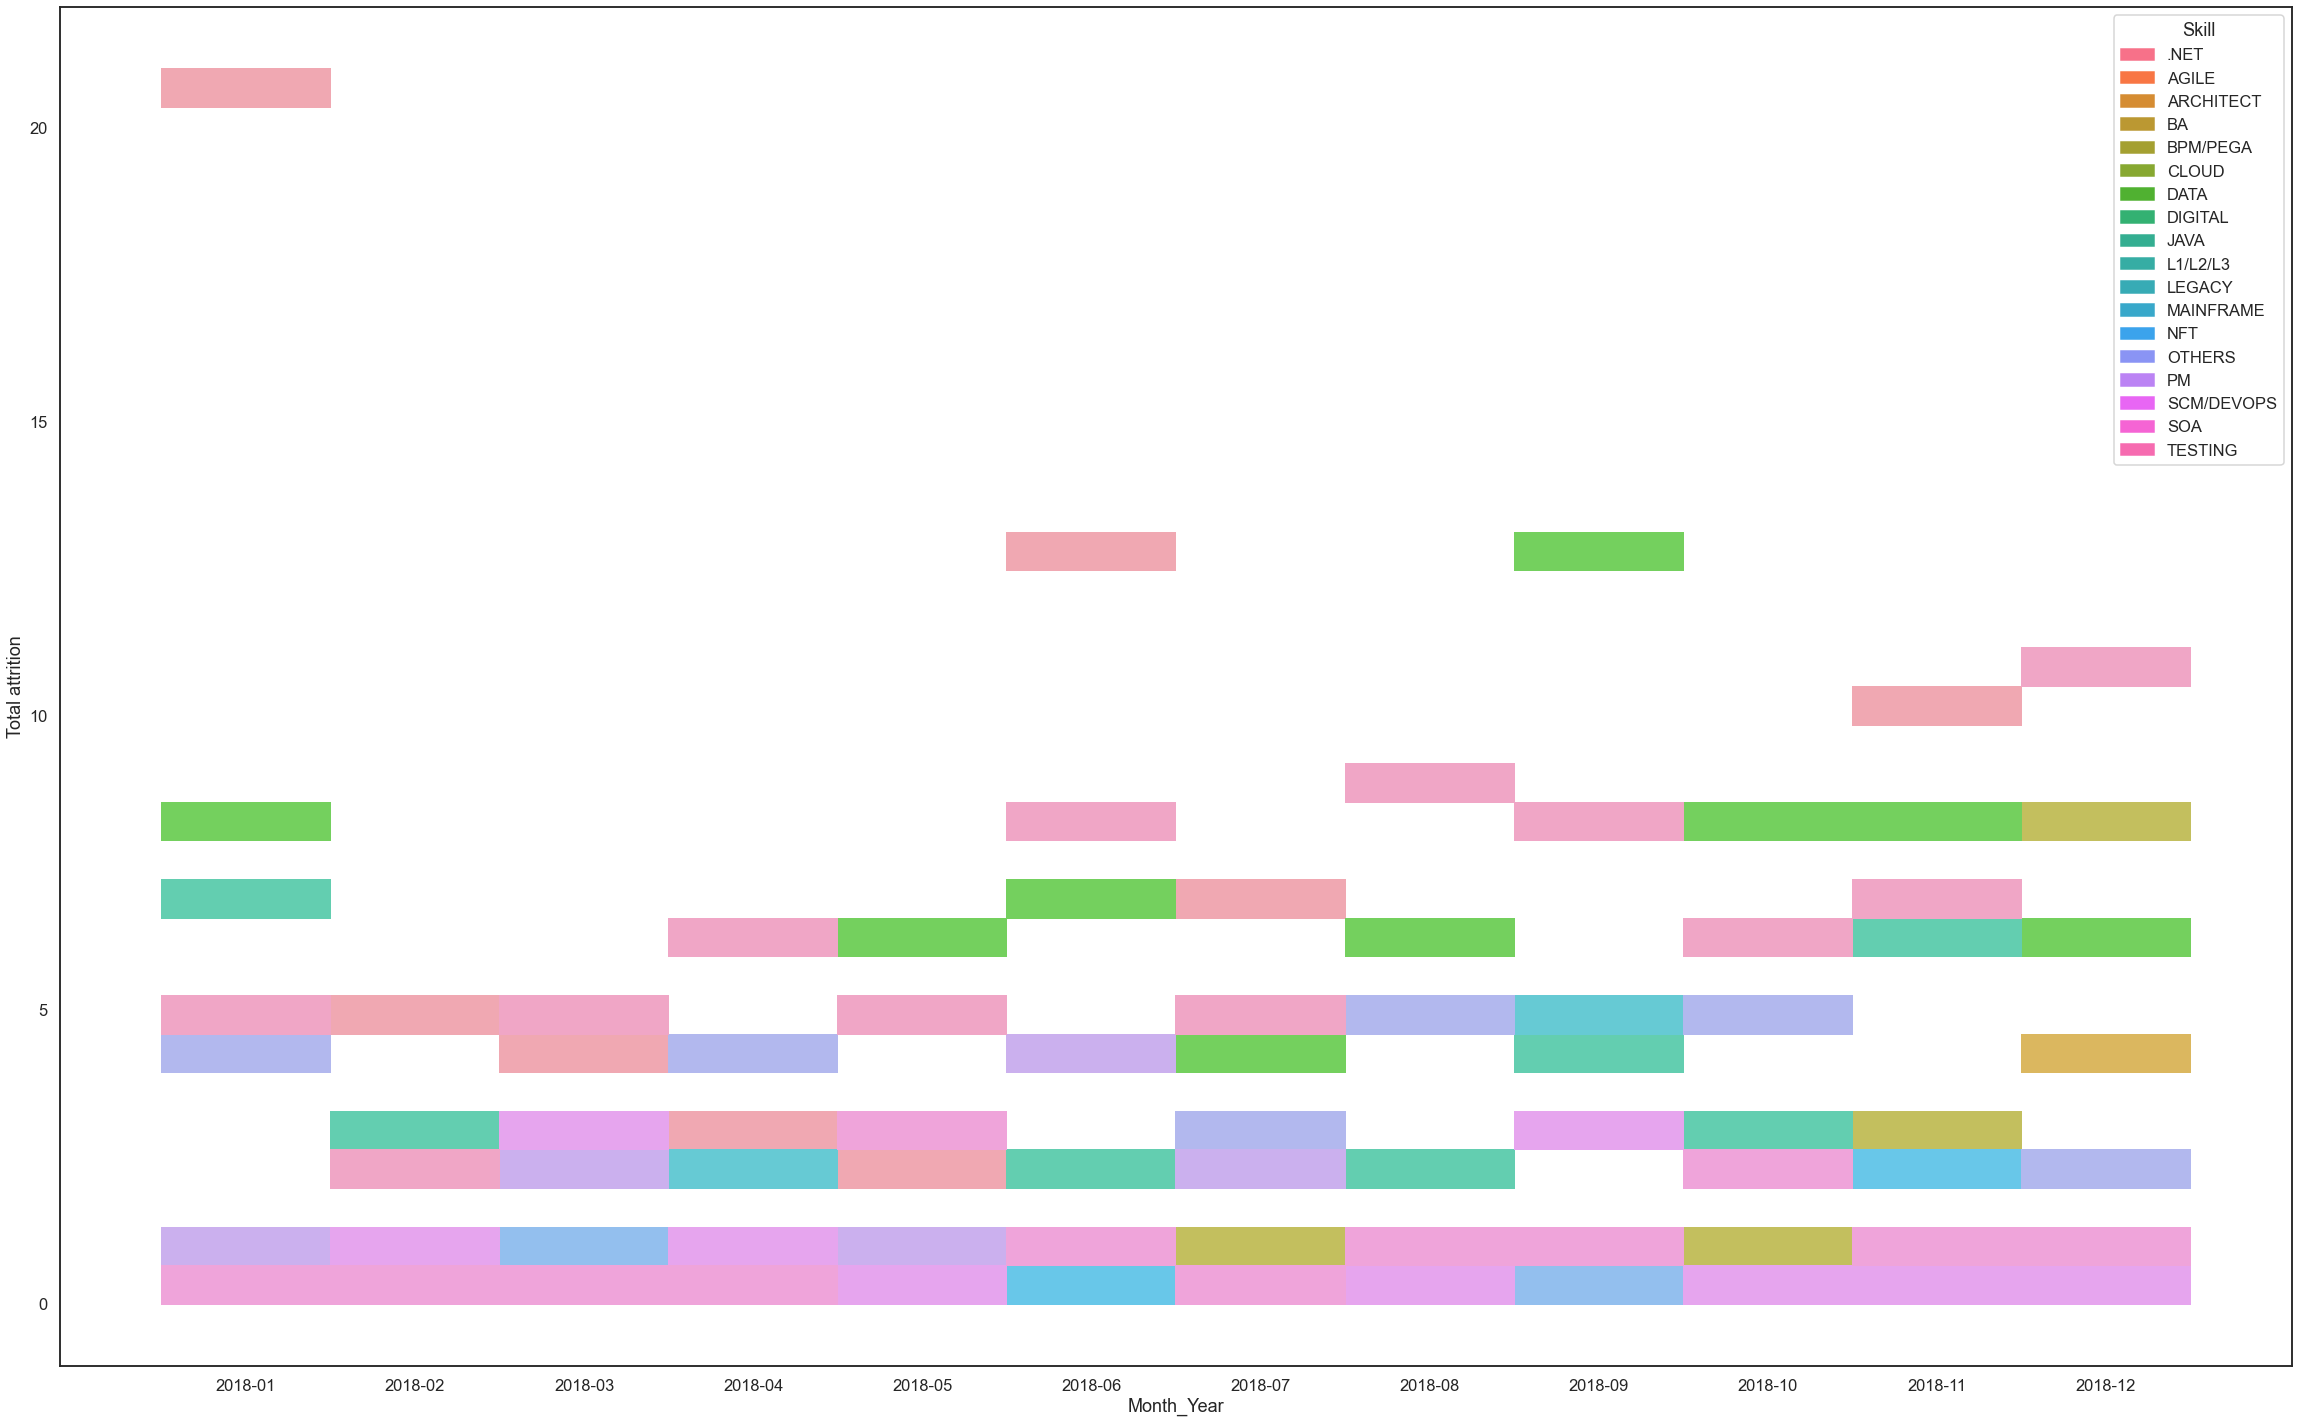

In [61]:
plt.figure(figsize=(40,25))
g = sns.histplot(data=df_2018, y="Total attrition", x='Month_Year', hue="Skill", multiple="stack")
for index, row in df_2018.iterrows():
    g.text(row.name,row.Skill, color='black', ha="center")

<AxesSubplot:>

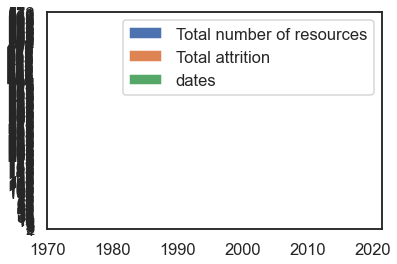

In [62]:
df_2018.plot(kind='barh')

In [ ]:
df_1 = df_date_summary.set_index('Month_Year')

In [ ]:
df_1.head()

In [ ]:
#plt.figure(figsize=(40,25))
g = df_1.plot(kind='bar',figsize=(40,30))
xlabels = ['Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Oct 2018',
           'Nov 2018','Dec 2018','Jan 2019','Feb 2019','Mar 2019','Apr 2019','May 2019','Jun 2019','Jul 2019','Aug 2019',
           'Sep 2019','Oct 2019', 'Nov 2019','Dec 2019', 'Jan 2020','Feb 2020','Mar 2020','Apr 2020','May 2020',
           'Jun 2020','Jul 2020','Aug 2020','Sep 2020']
g.set_xticklabels(xlabels, size=25)
g.set_xlabel("Month",fontsize=30)
for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
df_2 = df_skill_summary.copy

In [ ]:
df_skill_summary

In [ ]:
df_skill_summary_sort = df_skill_summary.sort_values(['Total attrition'],ascending = False)
g = df_skill_summary_sort.plot(kind='bar',figsize=(40,30))
g.set_yticklabels(g.get_yticks(), size = 25)
_, ylabels = plt.yticks()
x_offset = -0.03
y_offset = 0.02
for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [66]:
df.plot.pie(subplots=True,figsize=(30,15))

TypeError: Invalid comparison between dtype=datetime64[ns] and int